<a href="https://colab.research.google.com/github/PritcyVeke/dsc-phase-2-project-v2-3/blob/main/Phase_2_Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ANALYSIS ON KEY INDICATORS OF HOUSE PRICES
Research Objectives
Main Objective
To build a linear Regression Model that predicts House Prices

Specific Objectives
To Identify key features that influence house House prices

To assess the feature with the highest impact on House prices

To evaluate and validate the performance of the model

Business Problem
Real estate is a highly dynamic market influenced by numerous factors.This makes it challenging for real estate investors to accurately predict house prices. Inaccurate pricing models can lead to reduced profitability, missed opportunities, and dissatisfied customers. The current pricing strategy of the real estate company is suboptimal, leading to potential loss of revenue and increased customer dissatisfaction. Hence, the need of a robust predictive pricing model to enable companies stay competitive and adapt to market fluctuations.

Key Challenges:

Difficulty in identifying the most influential features impacting house prices.

Inability to accurately predict house prices based on relevant features.

Limited understanding of the factors driving property value in the current market.

Lack of a data-driven pricing strategy, leading to potential underpricing or overpricing of properties.

Project Overview
This project is an attempt to help real estate investors make informed decision on what type of houses they should invest in. This is in terms of the most impactful features, both positively and negatively, on House prices.The key components of the analysis include Data preparation, Feature selection and Engineering, Model Development, Evaluation and Validation.

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# loading the dataset
data=pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [2]:
# checking summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Data cleaning

In [3]:
# checking missing values
null= data.isna().sum()
null

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [4]:
# percentage of missing data
percentage_missing=null*100/len(data)
percentage_missing

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

In [5]:

# droping missing values
data.dropna(axis=0, subset=['view'], inplace=True)
data["view"].isnull().sum()

0

In [6]:
# replace missing values with  'unknown'
data['waterfront'].fillna('Unknown', inplace=True)
data["waterfront"].isnull().sum()

0

In [7]:
# replace  mising values '0'
data['yr_renovated'].fillna('0', inplace=True)
data["yr_renovated"].isnull().sum()

0

In [8]:
# checking if all missing data have been cleaned
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Transforming categorical data to numeric

In [10]:
#encoding 'grade' column
data['grade'].unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [12]:
# getting dummy variables
dummy_grade = pd.get_dummies(data['grade'], prefix='grade')

In [13]:
# Concatenate the dummy variables with the original DataFrame
data = pd.concat([data, dummy_grade], axis=1)

In [14]:
# Dropping the original 'grade' column
data = data.drop('grade', axis=1)
data = data.replace({True: 1, False: 0})
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,Unknown,NONE,...,0,0,0,0,0,0,0,1,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,0,0,0,0,0,0,0,1,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,0,0,0,0,0,0,1,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,0,0,0,0,0,0,0,1,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0,0,0,0,0,0,0,0,1,0


In [15]:

#encoding 'view' column
data['view'].unique()


array(['NONE', 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [17]:
# getting dummies
dummy_view = pd.get_dummies(data['view'], prefix='view')


In [18]:
data = data.drop('view', axis=1)
data = data.replace({True: 1, False: 0})
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,Unknown,Average,...,0,0,0,0,0,0,0,1,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,Average,...,0,0,0,0,0,0,0,1,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,Average,...,0,0,0,0,0,0,1,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,...,0,0,0,0,0,0,0,1,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,Average,...,0,0,0,0,0,0,0,0,1,0


In [19]:
#encoding 'waterfront' column
data['waterfront'].unique()

array(['Unknown', 'NO', 'YES'], dtype=object)

In [20]:
# getting dummies
dummy_waterfront = pd.get_dummies(data['waterfront'], prefix='waterfront')

In [21]:

#Concatenate the dummy variables with the original DataFrame
data = pd.concat([data, dummy_waterfront], axis=1)

In [22]:
# Dropping the original 'condition' column
data = data.drop('waterfront', axis=1)

In [23]:
data = data.replace({True: 1, False: 0})
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,...,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,waterfront_NO,waterfront_Unknown,waterfront_YES
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,Average,1180,...,0,0,0,0,1,0,0,0,1,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,Average,2170,...,0,0,0,0,1,0,0,1,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,Average,770,...,0,0,0,1,0,0,0,1,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,Very Good,1050,...,0,0,0,0,1,0,0,1,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,Average,1680,...,0,0,0,0,0,1,0,1,0,0


In [24]:
#encoding 'condition' column
data['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [26]:
# getting dummies
dummy_condition = pd.get_dummies(data['condition'], prefix='condition')

In [27]:
#Concatenate the dummy variables with the original DataFrame
data = pd.concat([data, dummy_condition], axis=1)

In [28]:
# Dropping the original 'condition' column
data = data.drop('condition', axis=1)
data = data.replace({True: 1, False: 0})
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,...,grade_8 Good,grade_9 Better,waterfront_NO,waterfront_Unknown,waterfront_YES,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,1180,0.0,...,0,0,0,1,0,1,0,0,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,2170,400.0,...,0,0,1,0,0,1,0,0,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,770,0.0,...,0,0,1,0,0,1,0,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,1050,910.0,...,0,0,1,0,0,0,0,0,0,1
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,1680,0.0,...,1,0,1,0,0,1,0,0,0,0


In [29]:
data['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0', '620.0',
       '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0', '450.0',
       '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0', '1070.0',
       '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0', '210.0',
       '1430.0', '1950.0', '440.0', '220.0', '1160.0', '860.0', '580.0',
       '2060.0', '1820.0', '1180.0', '200.0', '1150.0', '1200.0', '680.0',
       '530.0', '1450.0', '1170.0', '1080.0', '960.0', '280.0', '870.0',
       '1100.0', '460.0', '1400.0', '660.0', '1220.0', '900.0', '420.0',
       '1580.0', '1380.0', '475.0', '690.0', '270.0', 

In [30]:
dropping_question_mark = data[data['sqft_basement'] == '?']
data = data.drop(dropping_question_mark.index )


In [31]:
# changing data type of 'sqft_basement' to float
data['sqft_basement'] = data['sqft_basement'].astype('float64')
data.dtypes

id                       int64
date                    object
price                  float64
bedrooms                 int64
bathrooms              float64
sqft_living              int64
sqft_lot                 int64
floors                 float64
sqft_above               int64
sqft_basement          float64
yr_built                 int64
yr_renovated            object
zipcode                  int64
lat                    float64
long                   float64
sqft_living15            int64
sqft_lot15               int64
grade_10 Very Good       uint8
grade_11 Excellent       uint8
grade_12 Luxury          uint8
grade_13 Mansion         uint8
grade_3 Poor             uint8
grade_4 Low              uint8
grade_5 Fair             uint8
grade_6 Low Average      uint8
grade_7 Average          uint8
grade_8 Good             uint8
grade_9 Better           uint8
waterfront_NO            uint8
waterfront_Unknown       uint8
waterfront_YES           uint8
condition_Average        uint8
conditio

In [ ]:
Checking outliers

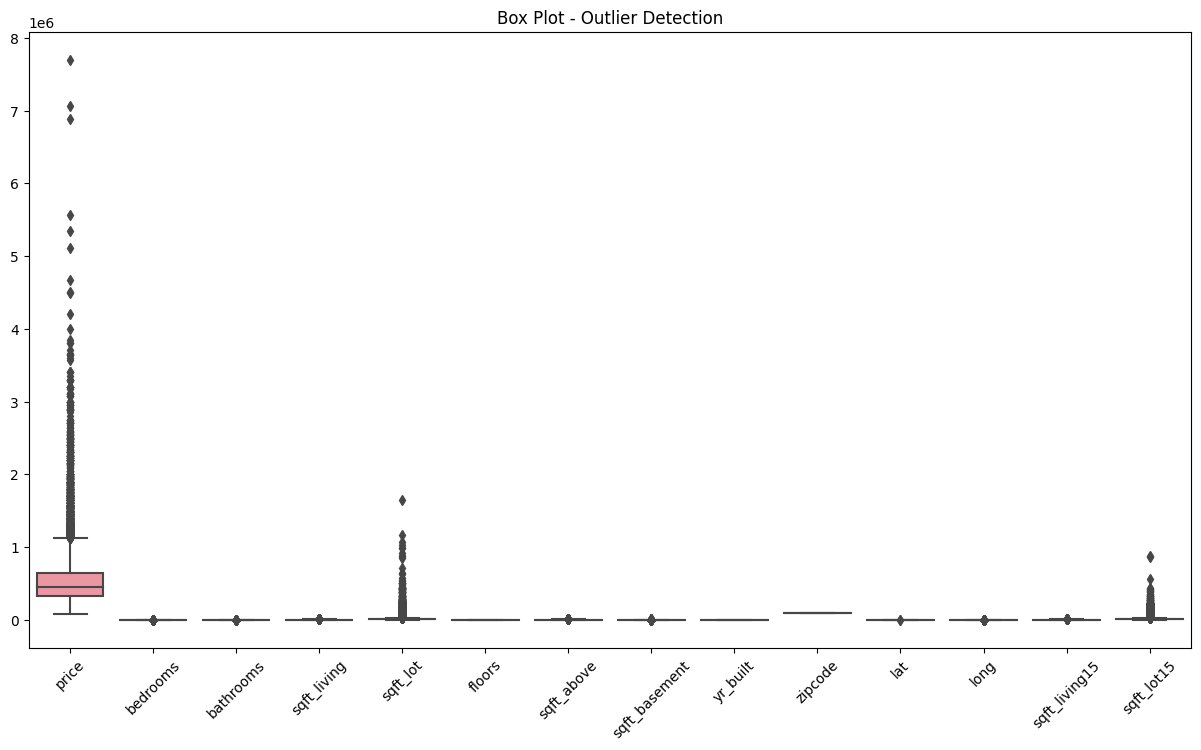

In [32]:
# Create box plots to visualize outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=data[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built',
        'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']])
plt.title('Box Plot - Outlier Detection')
plt.xticks(rotation=45)
plt.show()

In [35]:
# Calculating z-scores for numerical features
numeric_features =[ 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built',
        'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
z_scores = data[numeric_features].apply(lambda x: (x - x.mean()) / x.std())

# Identify outliers based on z-score threshold ( z-score > 3 or z-score < -3)
outliers = data[(z_scores > 3).any(axis=1)]

In [36]:
# Print the outliers
print('Outliers:')
print(outliers)


Outliers:
               id        date      price  bedrooms  bathrooms  sqft_living  \
5      7237550310   5/12/2014  1230000.0         4       4.50         5420   
10     1736800520    4/3/2015   662500.0         3       2.50         3560   
21     2524049179   8/26/2014  2000000.0         3       2.75         3050   
41     7766200013   8/11/2014   775000.0         4       2.25         4220   
70     1525059190   9/12/2014  1040000.0         5       3.25         4770   
...           ...         ...        ...       ...        ...          ...   
21545  6664500090   1/15/2015   750000.0         5       4.00         4500   
21552   524059330   1/30/2015  1700000.0         4       3.50         3830   
21560  9253900271    1/7/2015  3570000.0         5       4.50         4850   
21574  7430200100   5/14/2014  1220000.0         4       3.50         4910   
21584   249000205  10/15/2014  1540000.0         5       3.75         4470   

       sqft_lot  floors  sqft_above  sqft_basement  .

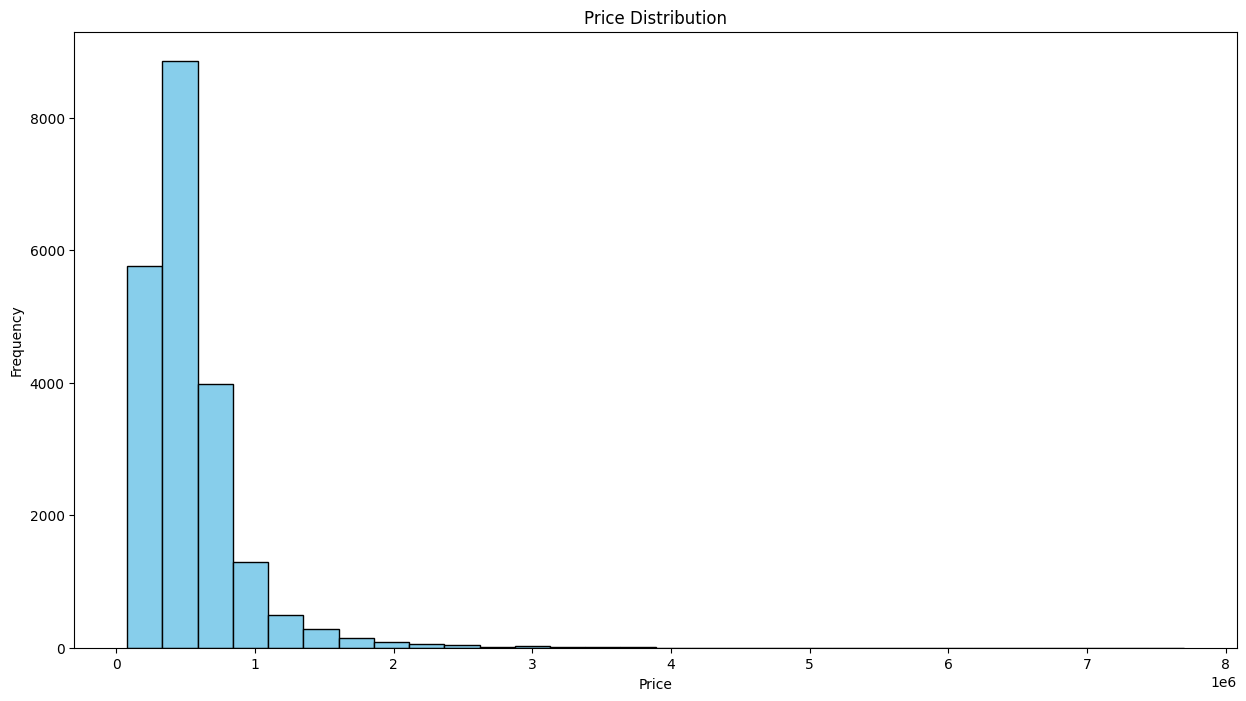

In [37]:

# visualizing price ditribution
plt.figure(figsize=(15, 8))
plt.hist(data['price'], bins= 30, color='skyblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Checking correlations and dealing with multicollinearity

<ipython-input-40-438401a52ee7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


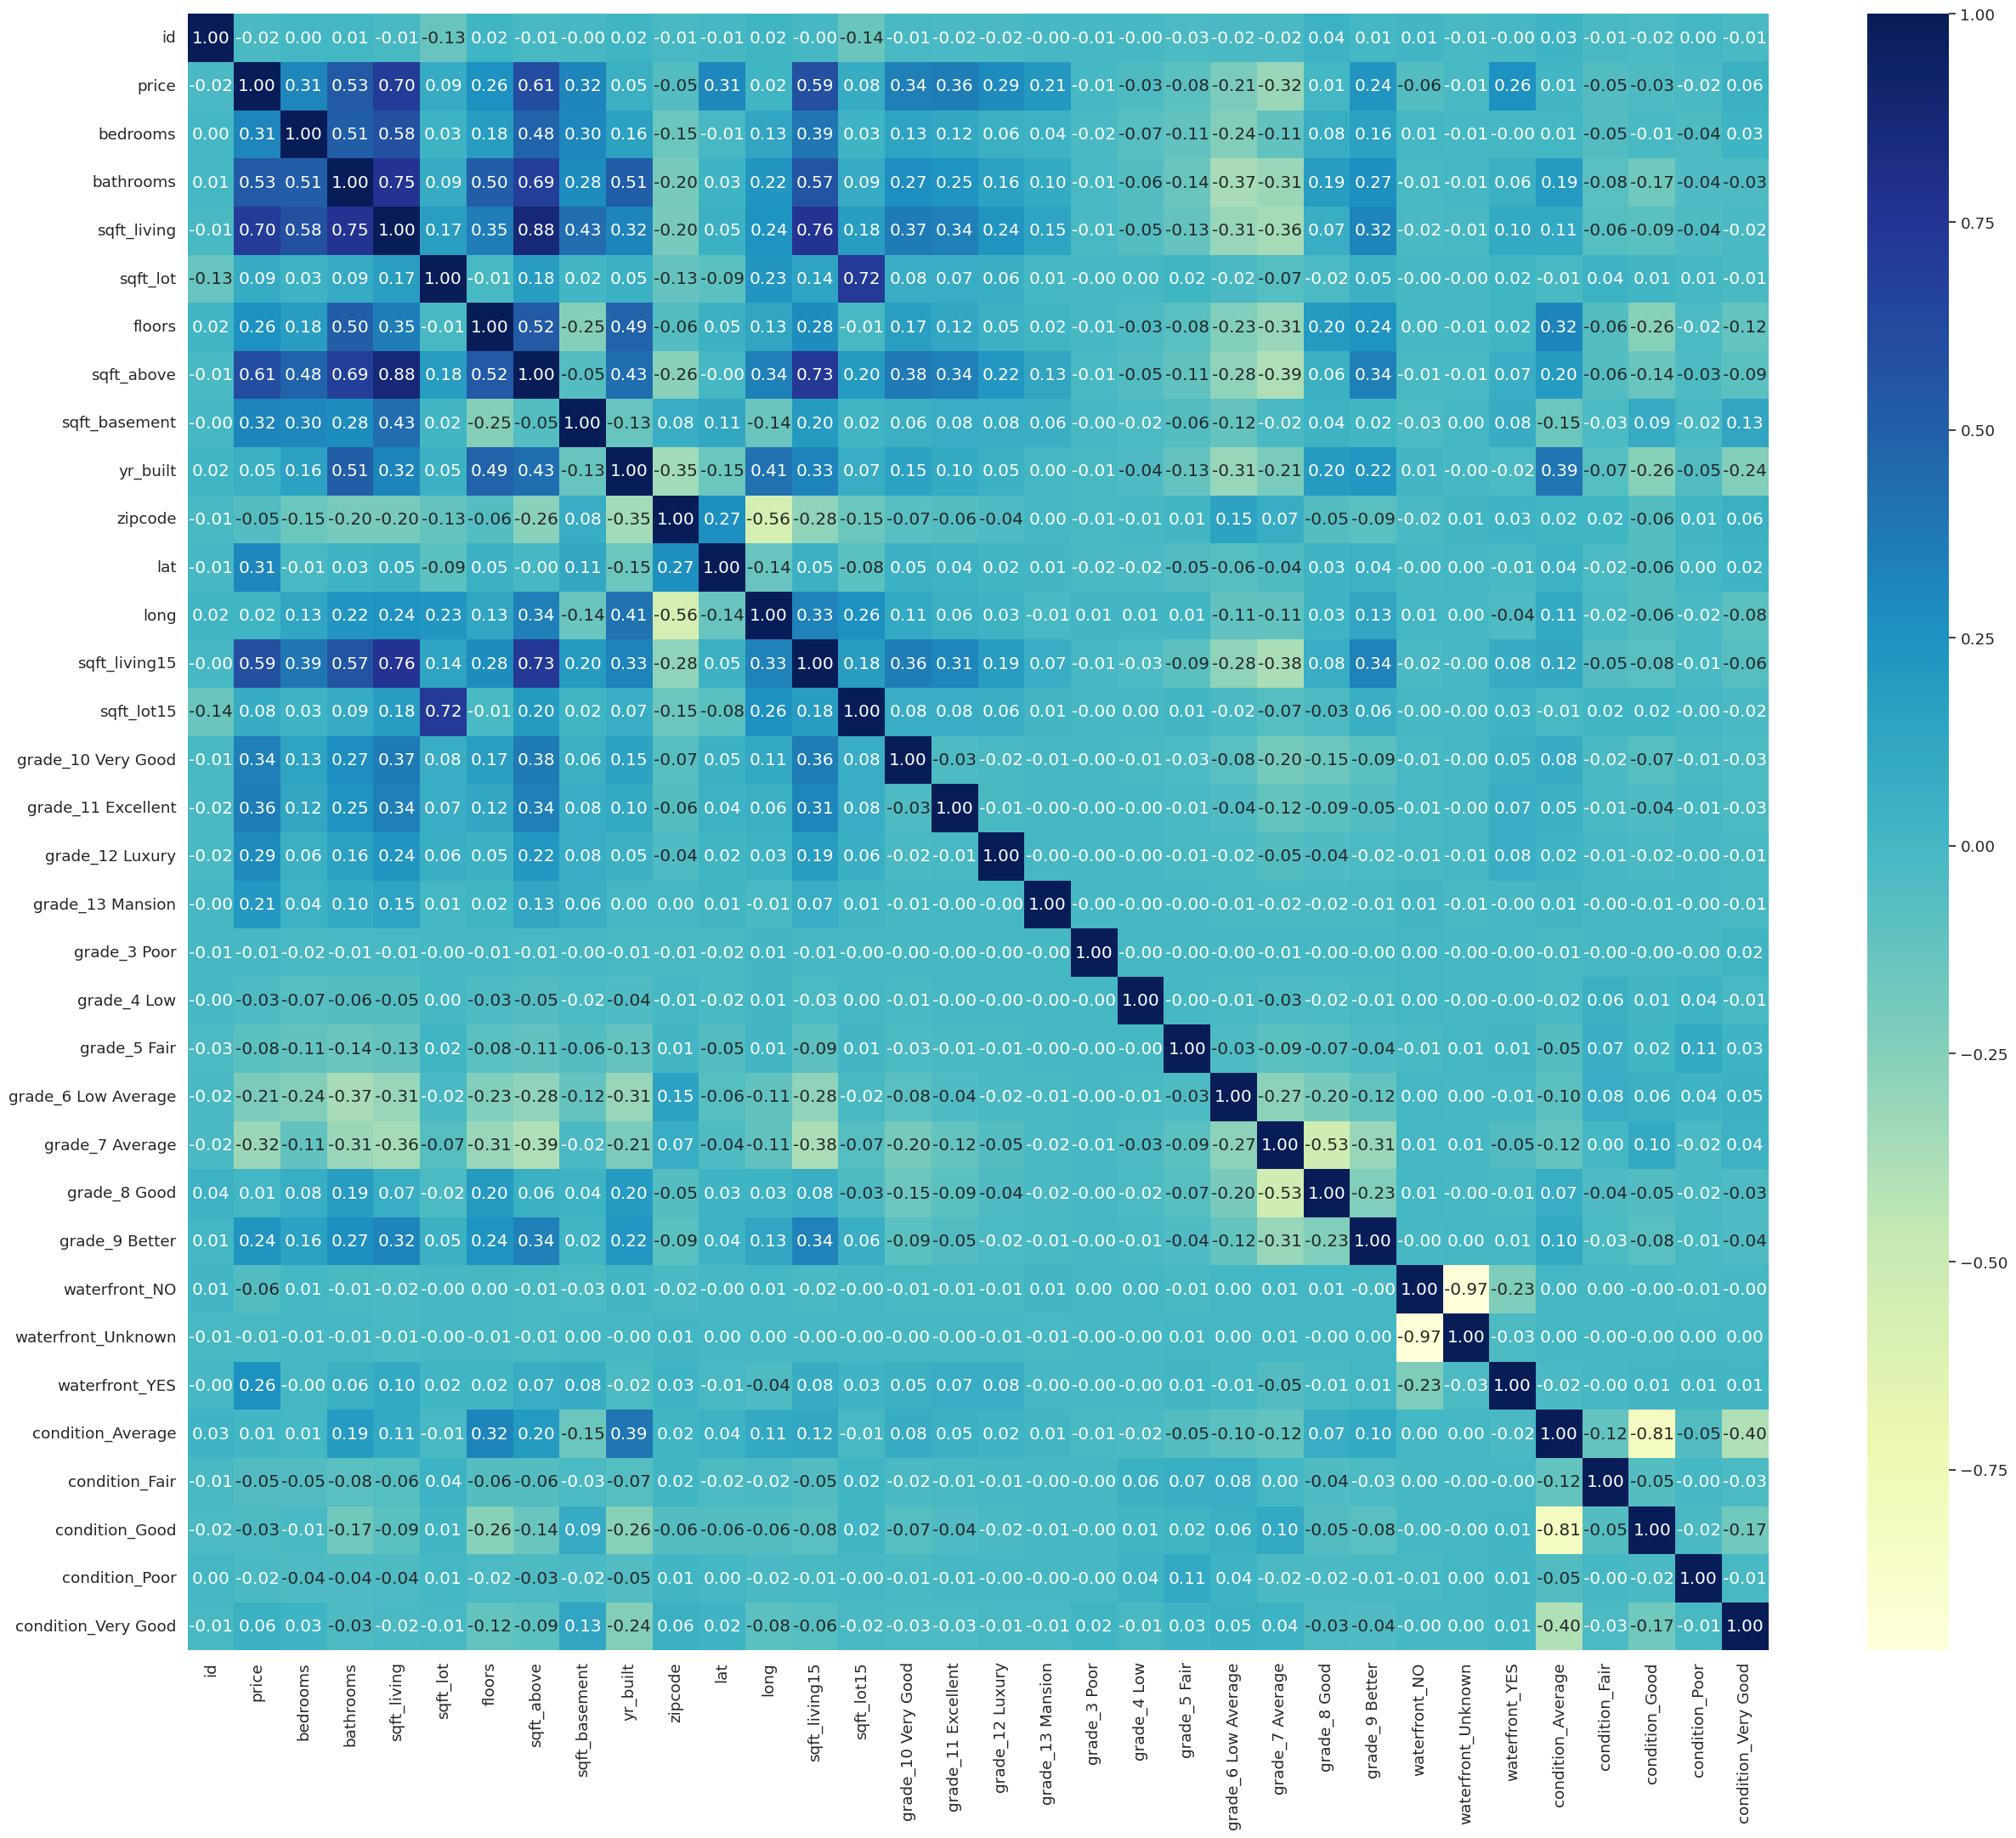

In [40]:


# Correlation matrix to see our variable correlations
correlation_matrix = data.corr()
correlation_matrix
# visualizing the correlations using heatmap
plt.figure(figsize=(30,25))
sns.set(font_scale=1.2)
sns.heatmap(correlation_matrix, annot=True, fmt="0.2f", cmap="YlGnBu")
plt.show()

In [42]:
# checking the highly correlated variables
#getting variables with high correlation, having 0.75 as the threshold
threshold = 0.75

# Finding indices where correlation is greater than the threshold and exclude self-correlation
row, col = np.where((np.abs(correlation_matrix) > threshold) & (np.abs(correlation_matrix) < 1))

# Creating a DataFrame with the pairs of variables and their correlation
high_corr_pairs = pd.DataFrame({
    'First_Variable': correlation_matrix.index[row],
    'Second_variable': correlation_matrix.columns[col],
    'Correlation': correlation_matrix.values[row, col]
})

# Display the pairs with high correlation
high_corr_pairs

,First_Variable,Second_variable,Correlation
0,bathrooms,sqft_living,0.754793
1,sqft_living,bathrooms,0.754793
2,sqft_living,sqft_above,0.876787
3,sqft_living,sqft_living15,0.756199
4,sqft_above,sqft_living,0.876787
5,sqft_living15,sqft_living,0.756199
6,waterfront_NO,waterfront_Unknown,-0.967427
7,waterfront_Unknown,waterfront_NO,-0.967427
8,condition_Average,condition_Good,-0.812130
9,condition_Good,condition_Average,-0.812130


In [44]:
# Checking correlations with price
corr_with_price=data.corr()['price']
corr_with_price

<ipython-input-44-cc3b9b972f01>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_with_price=data.corr()['price']


id                    -0.016413
price                  1.000000
bedrooms               0.308454
bathrooms              0.525029
sqft_living            0.702004
sqft_lot               0.088400
floors                 0.256603
sqft_above             0.605481
sqft_basement          0.323018
yr_built               0.054849
zipcode               -0.053429
lat                    0.307667
long                   0.022512
sqft_living15          0.586495
sqft_lot15             0.083530
grade_10 Very Good     0.341166
grade_11 Excellent     0.356823
grade_12 Luxury        0.287253
grade_13 Mansion       0.214754
grade_3 Poor          -0.005226
grade_4 Low           -0.032053
grade_5 Fair          -0.084017
grade_6 Low Average   -0.209440
grade_7 Average       -0.317149
grade_8 Good           0.005588
grade_9 Better         0.236420
waterfront_NO         -0.055680
waterfront_Unknown    -0.010632
waterfront_YES         0.260777
condition_Average      0.009548
condition_Fair        -0.052401
conditio

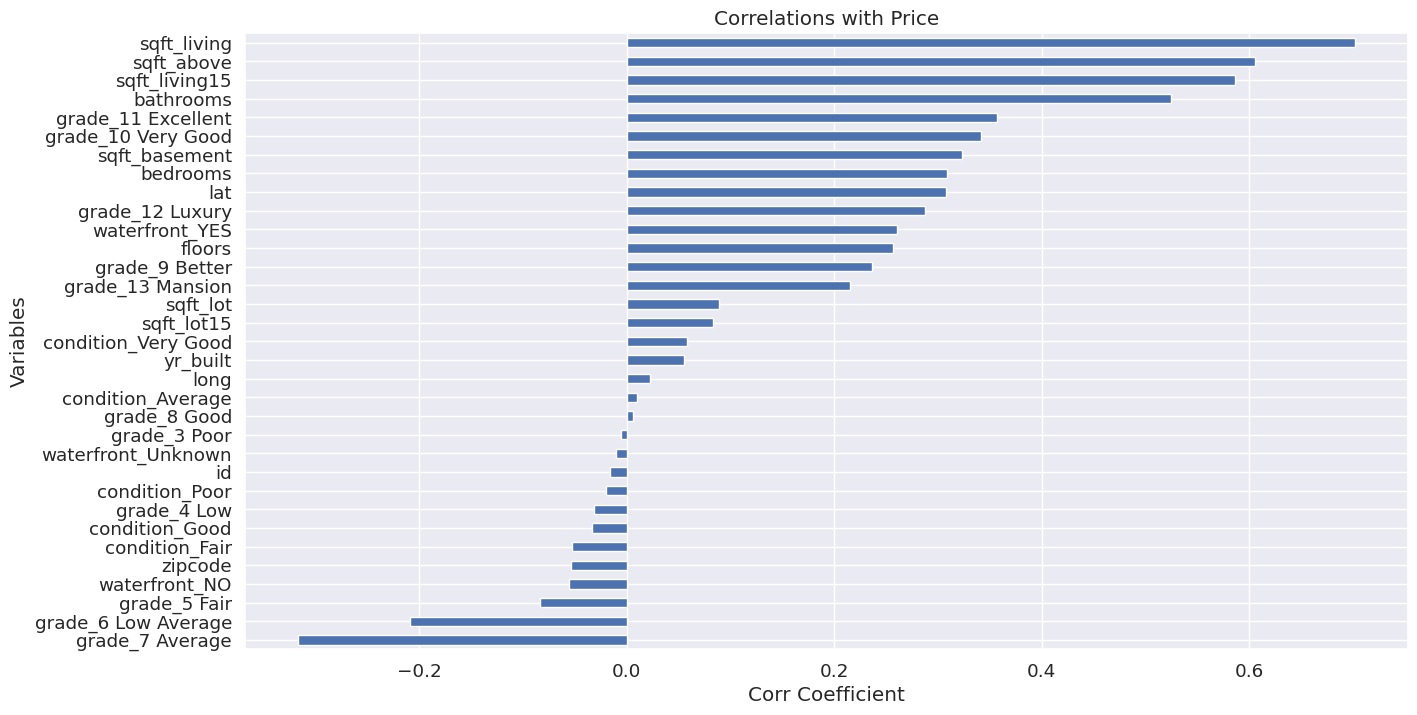

In [45]:
# plotting correlations with price
plt.figure(figsize=(15, 8))
corr_with_price.drop('price').sort_values().plot(kind='barh')
plt.title('Correlations with Price')
plt.xlabel('Corr Coefficient')
plt.ylabel('Variables')
plt.show();

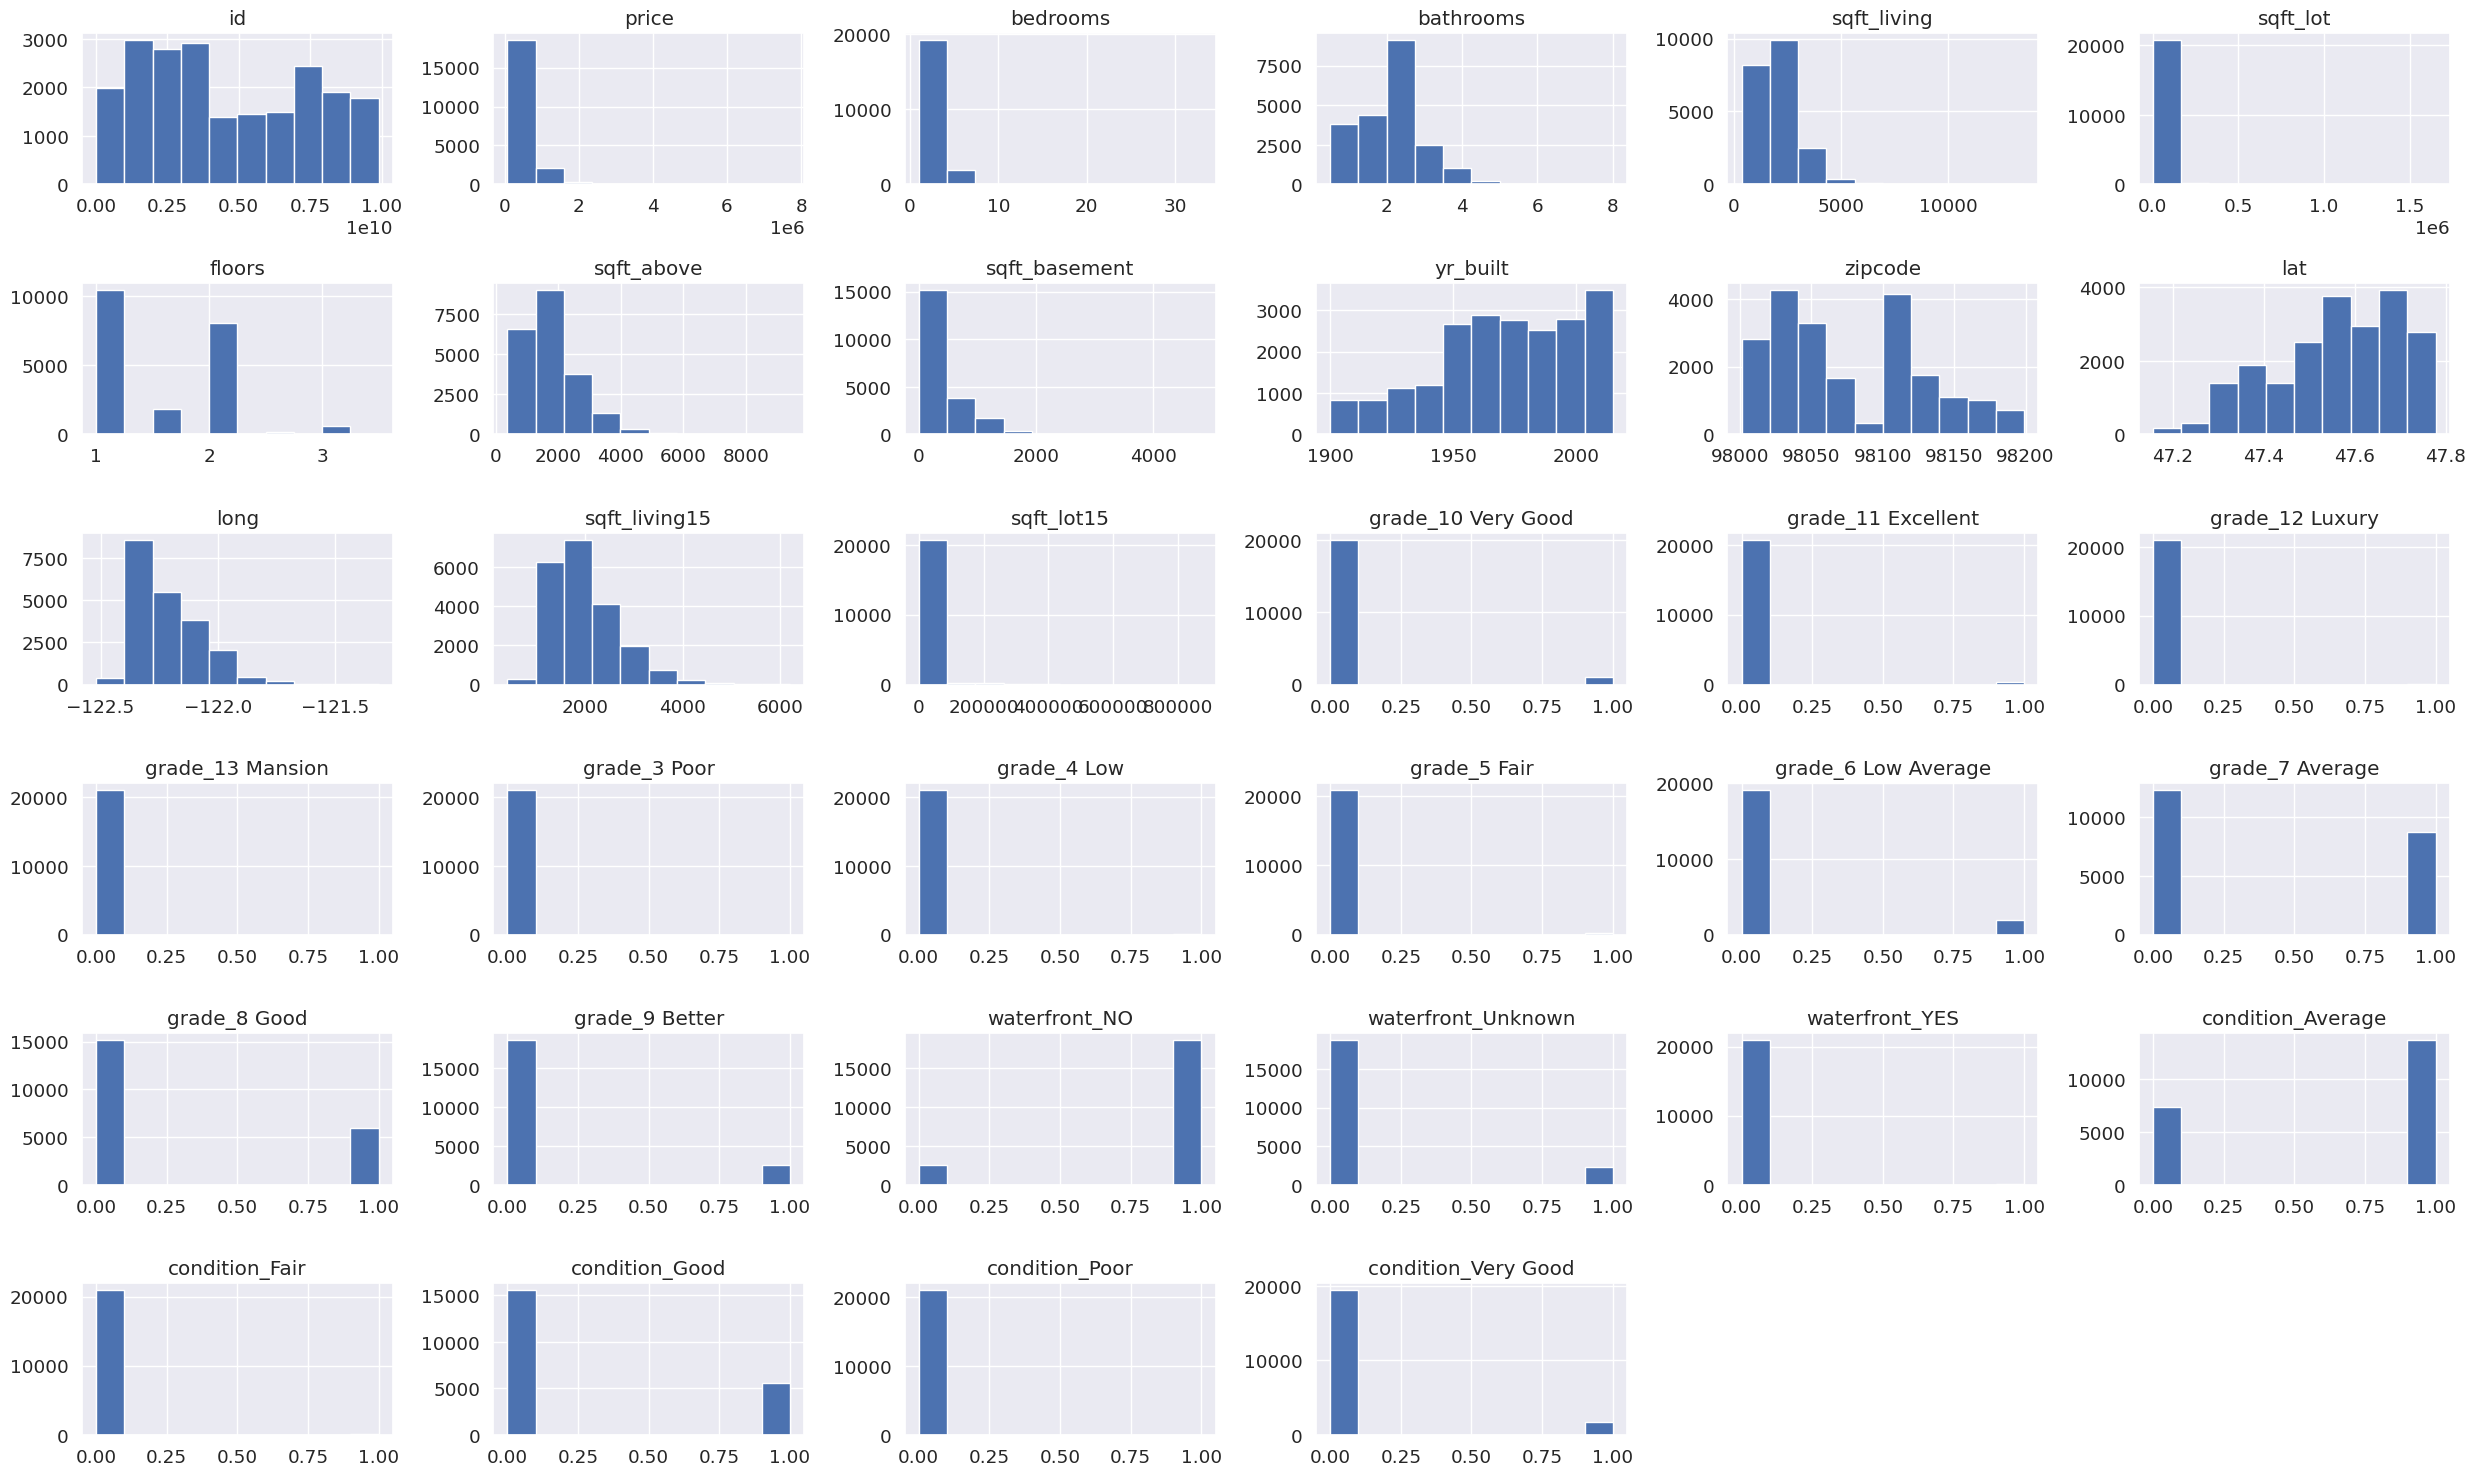

In [46]:
# histogram plot for distributions
data.hist(figsize=(25,15))
plt.tight_layout()
plt.show()

Building Linear Regression Model
Model Iterations
Building a baseline model(model1)
We will use simple linear regression as the baseline model performance.

In [48]:
# importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [49]:
data.corr()['price']

<ipython-input-49-8d819dfdca41>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['price']


id                    -0.016413
price                  1.000000
bedrooms               0.308454
bathrooms              0.525029
sqft_living            0.702004
sqft_lot               0.088400
floors                 0.256603
sqft_above             0.605481
sqft_basement          0.323018
yr_built               0.054849
zipcode               -0.053429
lat                    0.307667
long                   0.022512
sqft_living15          0.586495
sqft_lot15             0.083530
grade_10 Very Good     0.341166
grade_11 Excellent     0.356823
grade_12 Luxury        0.287253
grade_13 Mansion       0.214754
grade_3 Poor          -0.005226
grade_4 Low           -0.032053
grade_5 Fair          -0.084017
grade_6 Low Average   -0.209440
grade_7 Average       -0.317149
grade_8 Good           0.005588
grade_9 Better         0.236420
waterfront_NO         -0.055680
waterfront_Unknown    -0.010632
waterfront_YES         0.260777
condition_Average      0.009548
condition_Fair        -0.052401
conditio

In [50]:
# Selecting the dependent and independent variable
X_baseline = data[['sqft_living']]
y = data['price']
# adding a constant for the intercept
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
#fit the model
baseline_results = baseline_model.fit()
#make predictions
y_pred_baseline =baseline_results.predict(sm.add_constant(X_baseline))
# calculate rmse
baseline_rmse = np.sqrt(mean_squared_error(y, y_pred_baseline))
# displaying results

print(baseline_results.summary())

print(" RMSE for the baseline model:", baseline_rmse)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.048e+04
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        16:45:05   Log-Likelihood:            -2.9287e+05
No. Observations:               21082   AIC:                         5.857e+05
Df Residuals:                   21080   BIC:                         5.858e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.327e+04   4456.393     -9.709      

From the first model we note that the R squared is 0.493 to mean that 49.3% of variations in price are explained by square foot living.

The F statistic is 0.00 indicating that the overall model is significant.

The Model RSME is 261170.8023960749.

We had earlier noted that most variables did not follow a normal distribution 'price' being one of them. We will therefore log transform price to see if the model improves.

Model 2
Here we are inspecting how the model performs with only the 'price' transformed.

In [51]:
# Selecting the dependent and independent variable
X_baseline = data[['sqft_living']]
y = np.log(data['price']+1)
# adding a constant for the intercept
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
#fit the model
baseline_results = baseline_model.fit()
#make predictions
y_pred_baseline =baseline_results.predict(sm.add_constant(X_baseline))
# calculate rmse
baseline_rmse = np.sqrt(mean_squared_error(y, y_pred_baseline))
# displaying results

print(baseline_results.summary())

print(" RMSE for the baseline model:", baseline_rmse)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                 1.970e+04
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        16:46:33   Log-Likelihood:                -9429.6
No. Observations:               21082   AIC:                         1.886e+04
Df Residuals:                   21080   BIC:                         1.888e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.2190      0.006   1892.178      

The square foot of living now explains 48.3% ( R squared) of variations in price. We also still have an error 'The condition number is large, 5.63e+03. This might indicate that there are strong multicollinearity or other numerical problems.' We will then explore how the model performs after transforming both the feature and target variable.

Model 3
Here we have both 'sqft_living ' and 'price transformed'

In [52]:
# Selecting the dependent and independent variable
X = np.log(data[['sqft_living']])
y = np.log(data['price']+1)
# adding a constant for the intercept
model = sm.OLS(y, sm.add_constant(X))
#fit the model
results = model.fit()
#make predictions
y_pred = results.predict(sm.add_constant(X))
# calculate rmse
rmse = np.sqrt(mean_squared_error(y, y_pred))
# displaying results

print(results.summary())

print(" RMSE for the baseline model:", rmse)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.759e+04
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        16:47:21   Log-Likelihood:                -9989.4
No. Observations:               21082   AIC:                         1.998e+04
Df Residuals:                   21080   BIC:                         2.000e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.7255      0.048    140.854      

For the transformed variables, the target variable(price ) is now explained by 45.5%(R squared) in price. We also note that the error we were getting that (there is a possiblity of strong multicollinearity or other numeric problems) has been resolved.

In the next model we will try transform multiple features that do not follow a normal distribution and add them to our model. Then inspect how our model performs.

Before log transformation

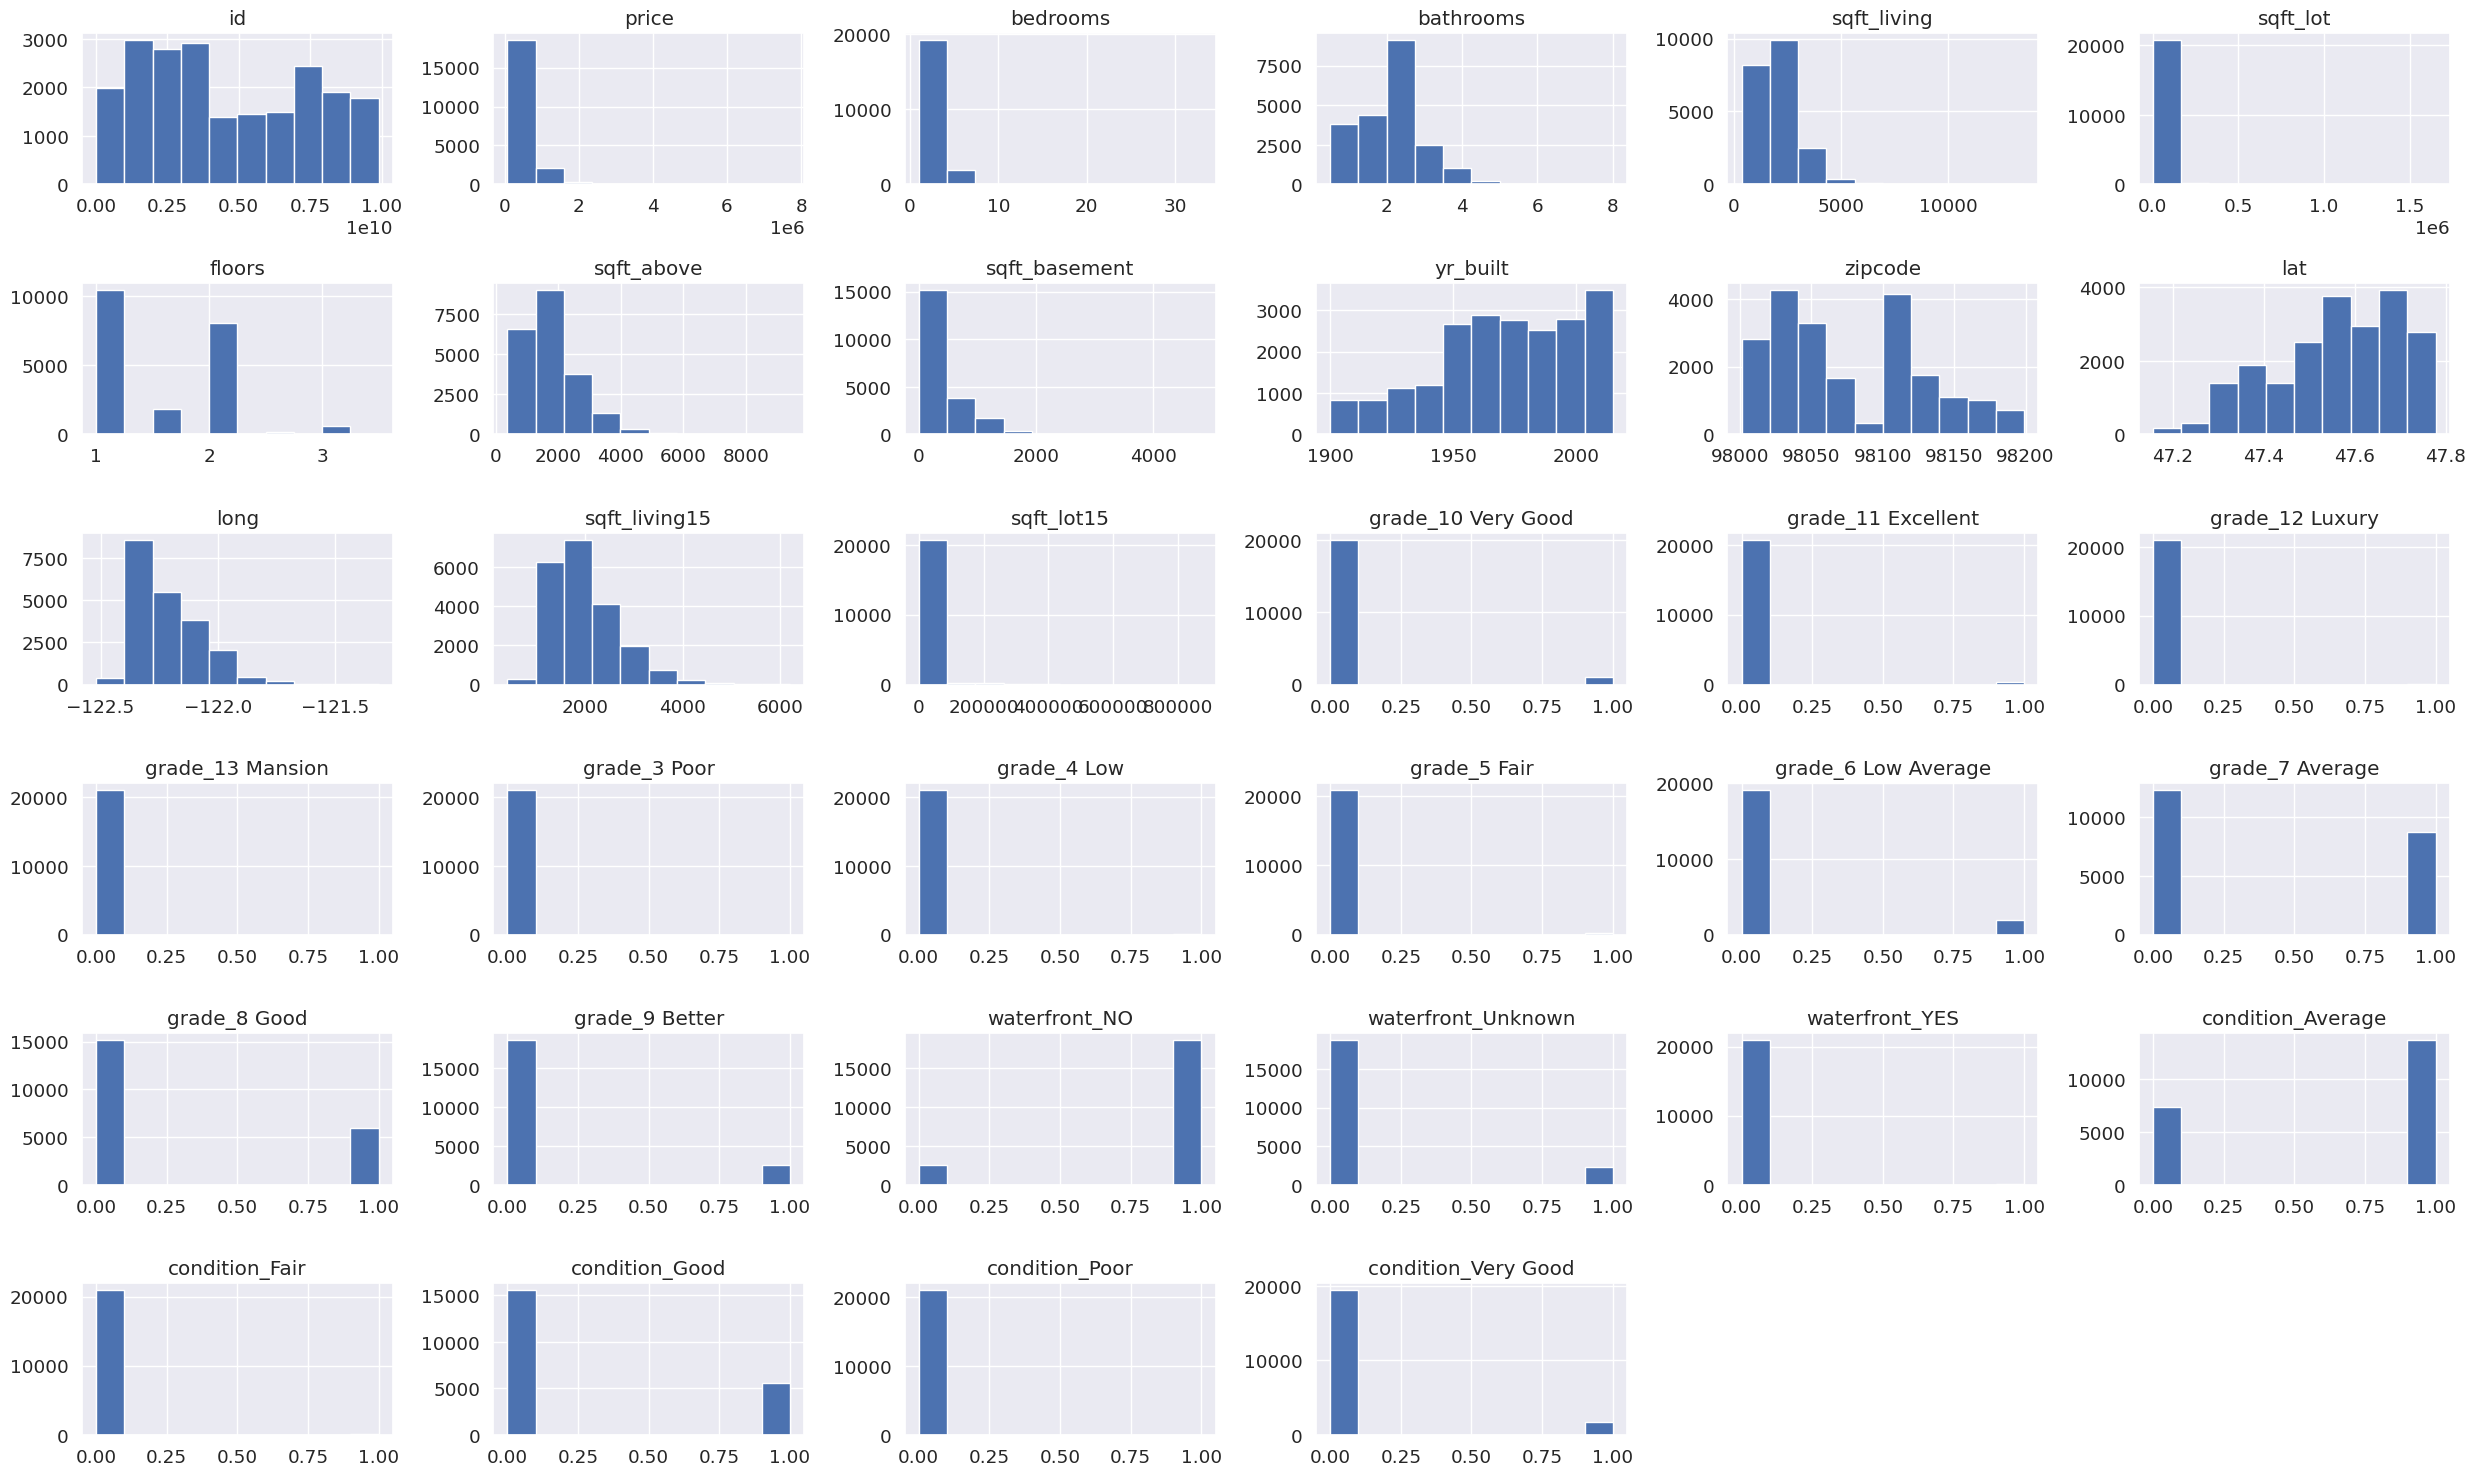

In [53]:
# histogram plot for distributions
data.hist(figsize=(25,15))
plt.tight_layout()
plt.show()

After Transformation

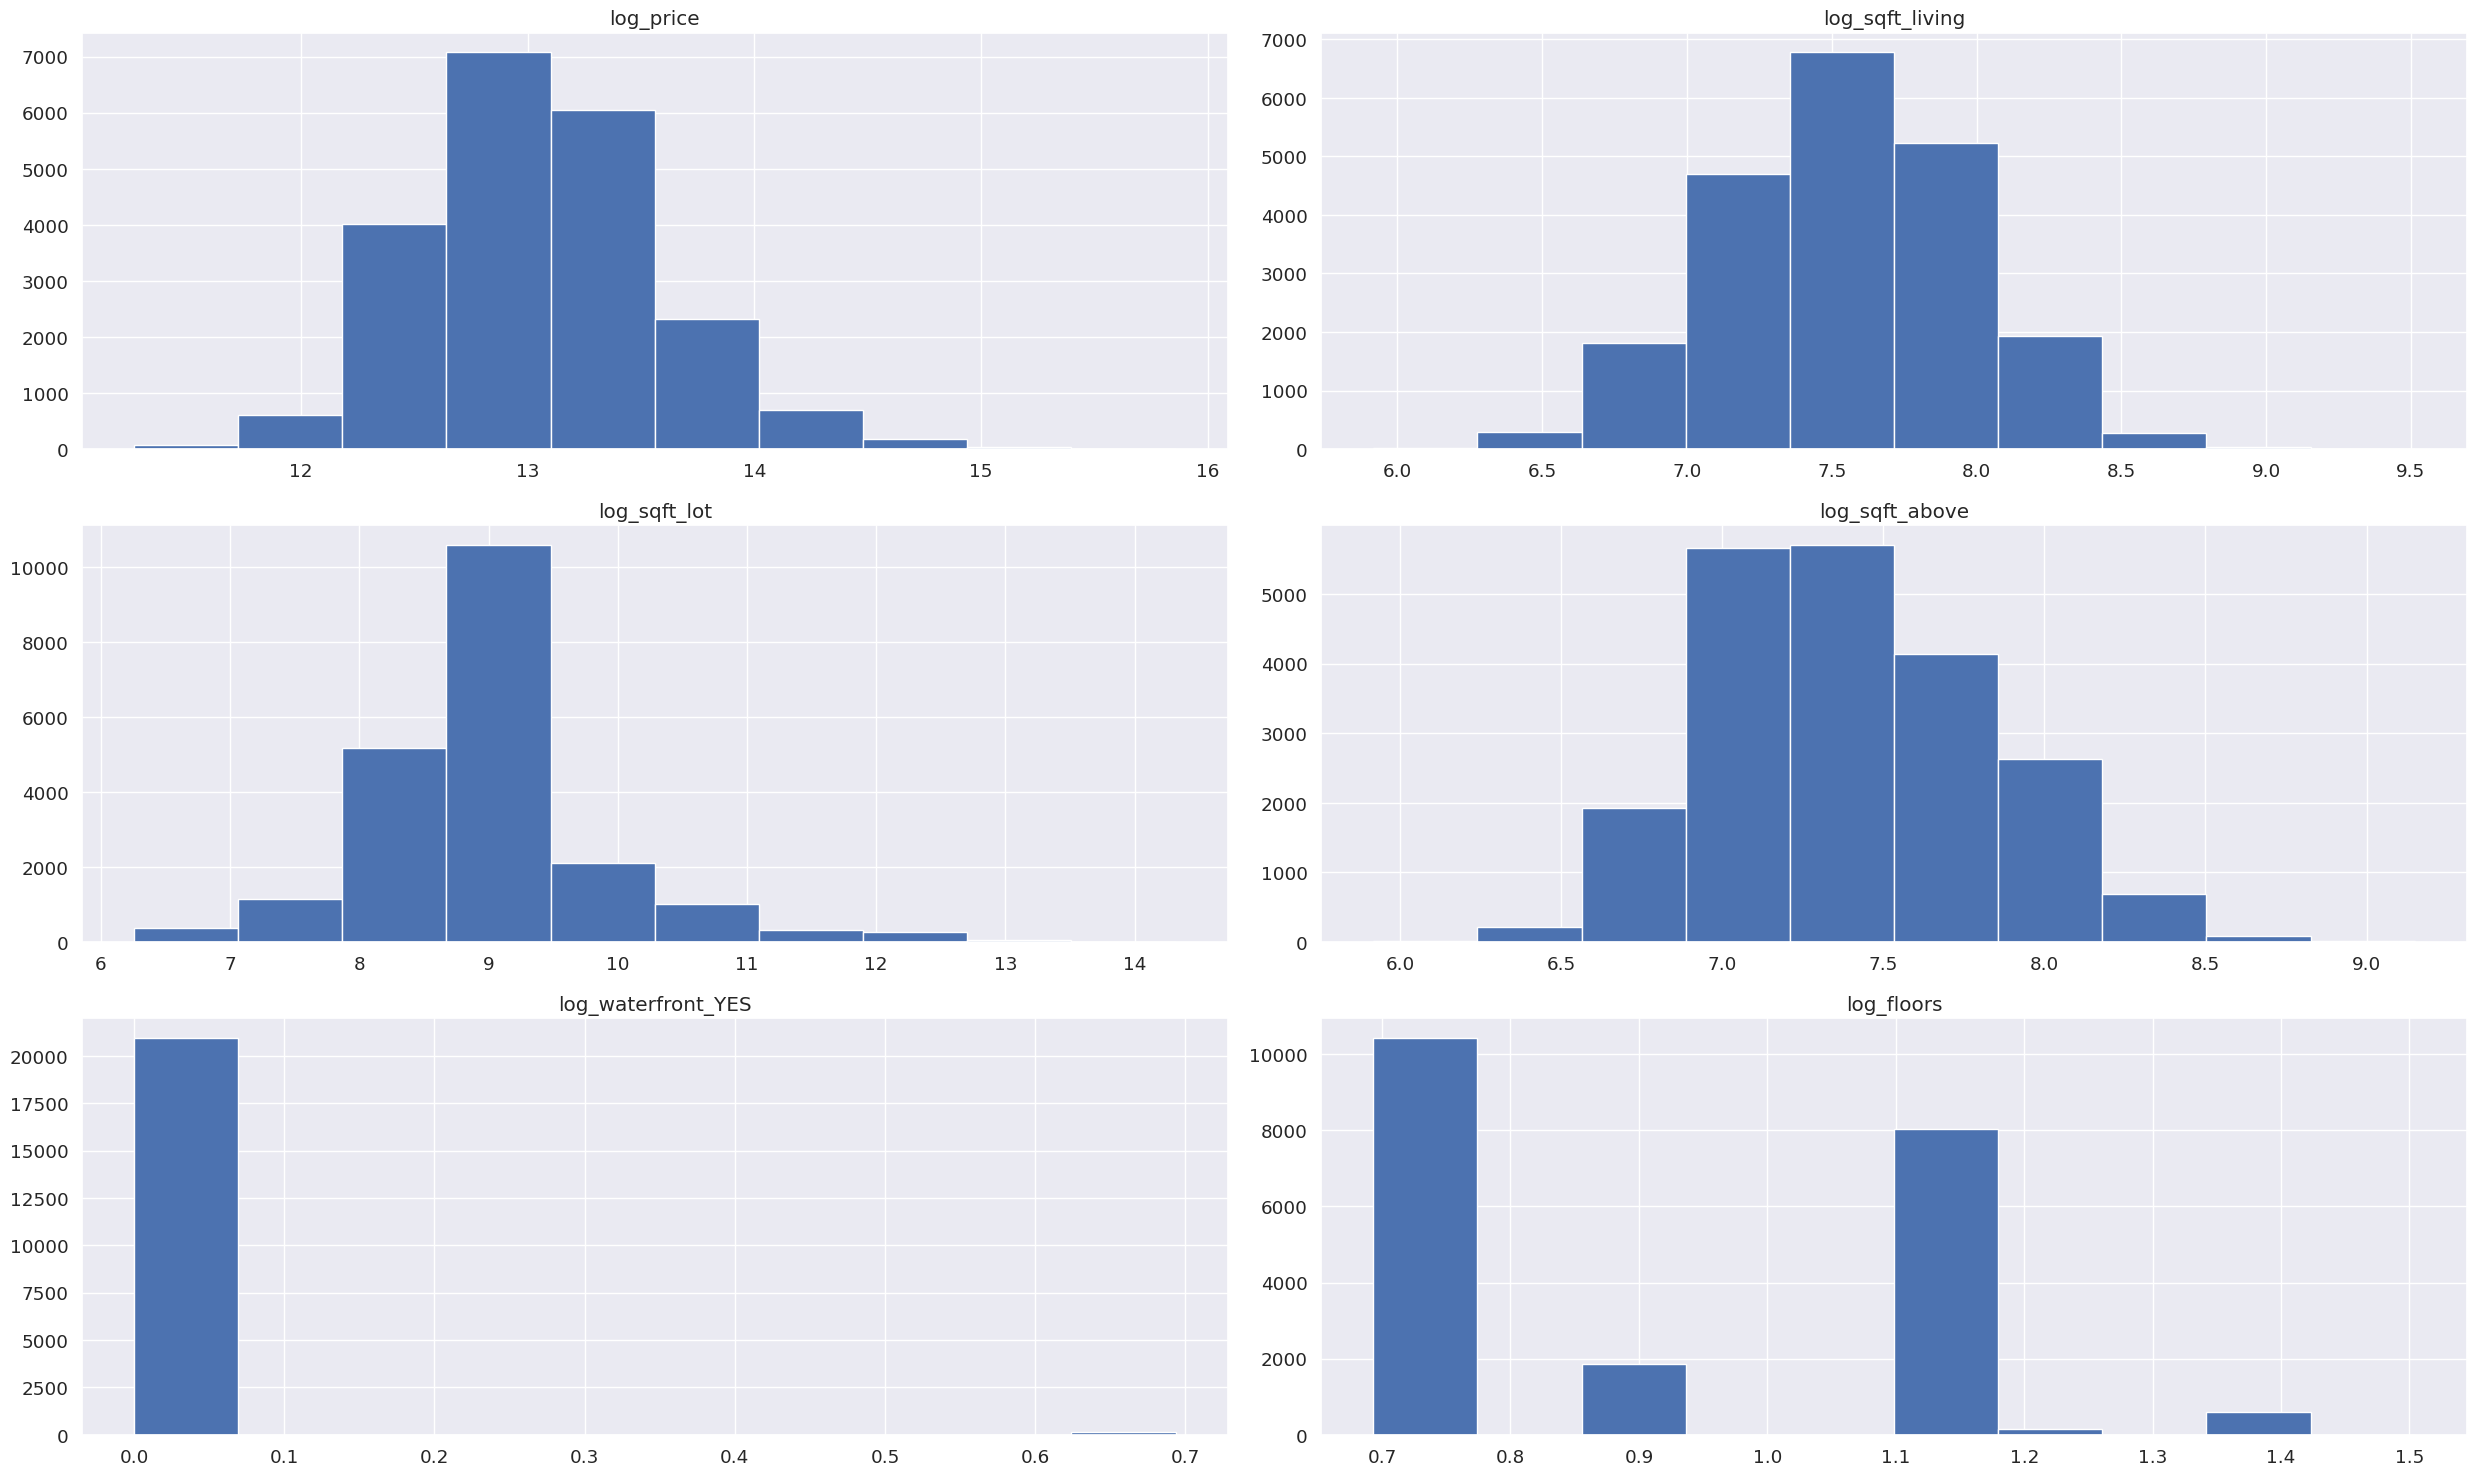

In [54]:
# log transformation to normalize the variables and rename them
data["log_price"]=np.log(data["price"]+1)
data["log_sqft_living"]=np.log(data["sqft_living"]+1)
data["log_sqft_lot"]=np.log(data["sqft_lot"]+1)
data["log_sqft_above"]=np.log(data["sqft_above"]+1)
data["log_waterfront_YES"]=np.log(data["waterfront_YES"]+1)
data["log_floors"]=np.log(data["floors"]+1)
# checking the transformed
plot_data=data[["log_price",'log_sqft_living' ,'log_sqft_lot', 'log_sqft_above', 'log_waterfront_YES', 'log_floors']]
plot_data.hist(figsize=(25,15))
plt.tight_layout()
plt.show()

Checking Regression Assumptions
We are going to check if the Regression model has passed the assumptions before doing interpretation of the results.

We will inspect Linearity, Independence, Normality and Equal Variance

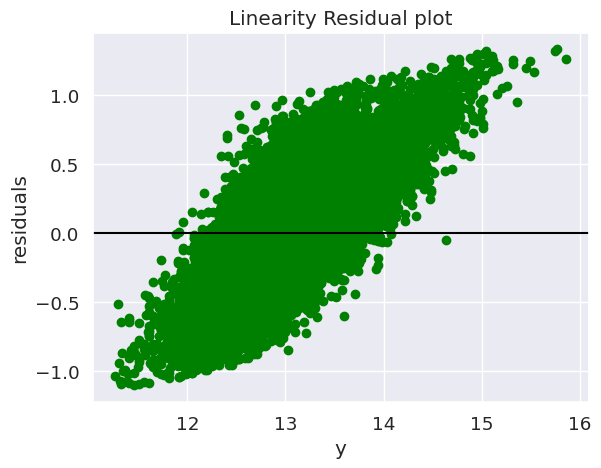

In [56]:

# plotting model results
fig, ax=plt.subplots()
ax.scatter(y, results.resid, color='green')
ax.axhline(y=0, color='black')
ax.set_xlabel('y')
ax.set_ylabel('residuals')
ax.set_title('Linearity Residual plot');

The points form a curvature to mean that the linearity assumption is met

Rainbow stat-test for linearity

In [57]:
# performing a rainbow test to test linearity statistically
from statsmodels.stats.diagnostic import linear_rainbow
linear_rainbow(results)

(0.9813435467039058, 0.8331516603651621)

The p value is close to 1.This high p-value indicates that there is not enough evidence to reject the null hypothesis of linearity. Therefore, based on this test, the assumption of linearity is considered to be met


Independence
The Durbin-Watson statistic is around 1.976 which suggests little to no autocorrelation in the residuals.

The Normality Assumption

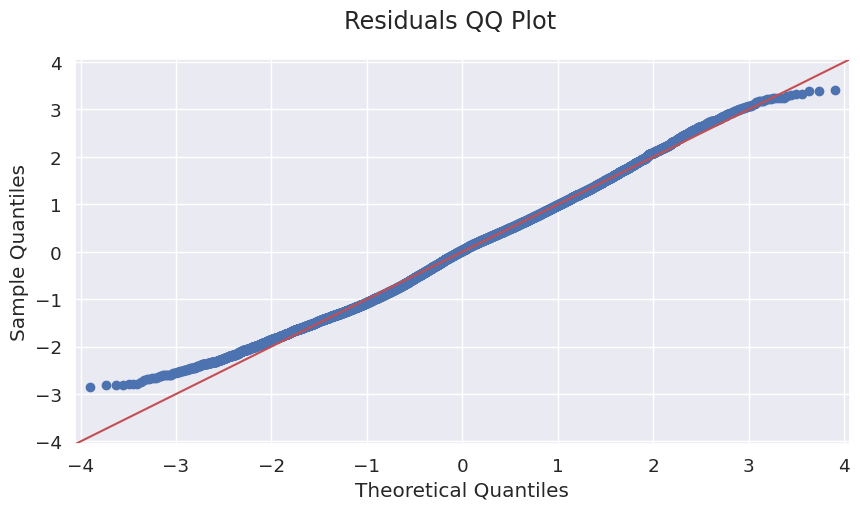

In [58]:
import scipy.stats as stats
residuals = results.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals QQ Plot')
fig.set_size_inches(10, 5)
plt.show()

The Homoscedasticity Assumption(Equal Variance)

Text(0, 0.5, 'Residuals')

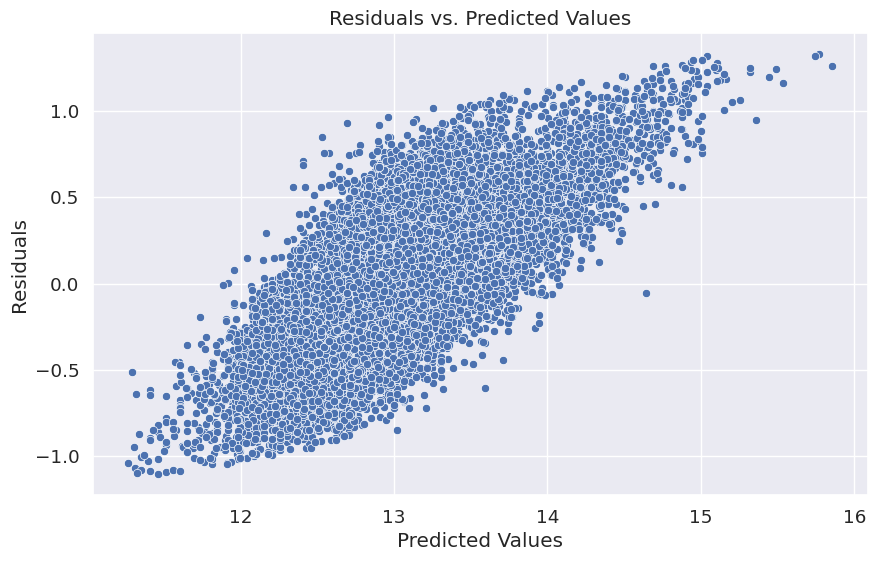

In [59]:
# scatter plot to check homoscedasticity
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['log_price'], y=results.resid)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

Fom the scatter plot we observe that there is little to no heteroscedasticity in the residuals.

Interpretation of results
Baseline Model: R-squared: 0.493 Adjusted R-squared: 0.493 RMSE: 261170.80

Model 2 (log-transformed price): R-squared: 0.483 Adjusted R-squared: 0.483 RMSE: 0.3785

Model 3 (log-transformed price and sqft_living): R-squared: 0.455 Adjusted R-squared: 0.455 RMSE: 0.3886

Model 4 (multiple features and log-transformed price): R-squared: 0.561 Adjusted R-squared: 0.561 RMSE: 0.3488

Analysis Interpretation: The R-squared values provide a measure of how well the models explains the variations in the target variable (price). As we progress from the baseline to the 4th model, the R-squared increases, indicating better explanatory power.

The RMSE values for the log-transformed models (Model 2 and Model 3), the RMSE is significantly lower than the baseline, indicating better predictive performance.

Model 4, which includes multiple features, the R-squared further improves, and the RMSE decreases compared to the log-transformed models. This suggests that the inclusion of additional features has enhanced the model's ability to predict prices.

*Interpretation:*

Model 4 with multiple features and log-transformed price performs better than the baseline model, both in terms of explanatory power and predictive accuracy. The probability F statistic being 0.00 means that the model overall is significant. Th P values for our coefficients all being 0.00 means that the coefficients as well are significant for our test.

Interpreting coefficients

grade_13 Mansion (Coefficient: 1.2596): A one-unit increase in the presence of the "Mansion" grade is associated with an estimated increase of approximately 1.2596 units in the log of house prices. This variable has the highest positive coefficient.

grade_12 Luxury (Coefficient: 0.8849): one-unit increase in the presence of the "Luxury" grade is associated with an estimated increase of approximately 0.8849 units in the log of house prices. The "Luxury" grade has the second-highest positive coefficient.

grade_11 Excellent (Coefficient: 0.6763): A one-unit increase in the presence of the "Excellent" grade is associated with an estimated increase of approximately 0.6763 units in the log of house prices. Houses with an "Excellent" grade have the third-highest positive coefficient.

log_sqft_living (Coefficient: 0.7078): A one-unit increase in the logarithm of square footage living area is associated with an estimated increase of approximately 0.7078 units in the log of house prices. The logarithm of square footage living area has a positive impact.

grade_10 Very Good (Coefficient: 0.4745): A one-unit increase in the presence of the "Very Good" grade is associated with an estimated increase of approximately 0.4745 units in the log of house prices. Houses with a "Very Good" grade contribute positively.

view_EXCELLENT (Coefficient: 0.2958): A one-unit increase in the presence of an "Excellent" view is associated with an estimated increase of approximately 0.2958 units in the log of house prices Houses with an "Excellent" view contribute positively.

waterfront_YES (Coefficient: 0.4086): A one-unit increase in the presence of a waterfront is associated with an estimated increase of approximately 0.4086 units in the log of house prices. Houses with a waterfront contribute positively.

grade_9 Better (Coefficient: 0.2741): A one-unit increase in the presence of the "Better" grade is associated with an estimated increase of approximately 0.2741 units in the log of house prices Houses with a "Better" grade contribute positively.

condition_Very Good (Coefficient: 0.1580): A one-unit increase in the presence of a "Very Good" condition is associated with an estimated increase of approximately 0.1580 units in the log of house prices. Houses in very good condition contribute positively.

log_sqft_above (Coefficient: -0.1240): A one-unit increase in the logarithm of square footage above is associated with an estimated decrease of approximately 0.1240 units in the log of house prices. The logarithm of square footage of the lot above has a negative impact.

grade_7 Average (Coefficient: -0.0812): A one-unit increase in the presence of the "Average" grade is associated with an estimated decrease of approximately 0.0812 units in the log of house prices. Houses with an "Average" grade (grade 7) contribute negatively.

log_sqft_lot (Coefficient: -0.0640): A one-unit increase in the logarithm of square footage of the lot is associated with an estimated decrease of approximately 0.0640 units in the log of house prices. The logarithm of square footage of the lot has a negative impact.

Summary
The features associated with higher-grade classifications (grade_13 Mansion, grade_11 Excellent, grade_12 Luxury) and larger living area (log_sqft_living) have the most positive impact on house prices, while features like lower-grade classifications (grade_7 Average) and smaller square footage above ground (log_sqft_above) have a negative impact.

Answering objectives
What are the key features that influence house prices
The features associated with higher-grade classifications (grade_13 Mansion, grade_11 Excellent, grade_12 Luxury) and larger living area (log_sqft_living) have the most positive impact on house prices, while features like lower-grade classifications (grade_7 Average) and smaller square footage above ground (log_sqft_above) have a negative impact.

What Feature has the highest impact on house prices
Houses with a grade grade_13 Mansion (Coefficient: 1.2596) had the highest influence of house prices.

Evaluating and validating the performnance of the model.
The study developed multiple predictive models with increasing complexity, including log-transformed price, log-transformed price with additional features, and multiple features. The models were evaluated using metrics such as R-squared and RMSE to assess their explanatory power and predictive accuracy. The improvement in R-squared values and the reduction in RMSE indicate successful model development and validation.

Recommendations from our study
-Grade has been identified to have the most impact on House prices. This includes various factors such as the quality of construction, materials used, architectural design, and overall condition. Real estate investors seeking premium returns should consider the grade of the house.

-Real estate investors should also consider waterfront locations and excellent views as they also impact prices.

-Real estate investors should recognize the positive impact of larger living areas, as indicated by the log_sqft_living variable in order to fetch higher returns.

-Investors should be mindful of features with a negative impact on house prices, such as lower-grade classifications ("Average") and smaller square footage above ground (log_sqft_above).

Limititations of the study
-The study doesn'consider external factors such as economic policies, interest rates, or global economic conditions, which can influence the real estate market.

-While the analysis identifies associations between features and house prices, it doesn't establish causation. The observed relationships may be influenced by confounding factors not included in the model

-The analysis assumes a linear relationship between the independent variables and the house prices. Non-linear relationships or interactions between variables might not be fully captured.

-Linear regression assumes continuous independent variables. While categorical variables can be included using dummy coding, this approach might not capture the full complexity of categorical relationships.

In [ ]:


Model 3
Here we have both 'sqft_living ' and 'price transformed'

# Selecting the dependent and independent variable
X = np.log(data[['sqft_living']])
y = np.log(data['price']+1)
# adding a constant for the intercept
model = sm.OLS(y, sm.add_constant(X))
#fit the model
results = model.fit()
#make predictions
y_pred = results.predict(sm.add_constant(X))
# calculate rmse
rmse = np.sqrt(mean_squared_error(y, y_pred))
# displaying results

print(results.summary())

print(" RMSE for the baseline model:", rmse)
                            OLS Regression Results
==============================================================================
Dep. Variable:                  price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.759e+04
Date:                Fri, 29 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:26:41   Log-Likelihood:                -9989.4
No. Observations:               21082   AIC:                         1.998e+04
Df Residuals:                   21080   BIC:                         2.000e+04
Df Model:                           1
Covariance Type:            nonrobust
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.7255      0.048    140.854      0.000       6.632       6.819
sqft_living     0.8374      0.006    132.627      0.000       0.825       0.850
==============================================================================
Omnibus:                      121.179   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.125
Skew:                           0.144   Prob(JB):                     4.49e-25
Kurtosis:                       2.789   Cond. No.                         137.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
 RMSE for the baseline model: 0.3886403105841183
For the transformed variables, the target variable(price ) is now explained by 45.5%(R squared) in price. We also note that the error we were getting that (there is a possiblity of strong multicollinearity or other numeric problems) has been resolved.

In the next model we will try transform multiple features that do not follow a normal distribution and add them to our model. Then inspect how our model performs.

Before log transformation
# histogram plot for distributions
data.hist(figsize=(25,15))
plt.tight_layout()
plt.show()

After log transformation
# log transformation to normalize the variables and rename them
data["log_price"]=np.log(data["price"]+1)
data["log_sqft_living"]=np.log(data["sqft_living"]+1)
data["log_sqft_lot"]=np.log(data["sqft_lot"]+1)
data["log_sqft_above"]=np.log(data["sqft_above"]+1)
data["log_waterfront_YES"]=np.log(data["waterfront_YES"]+1)
data["log_floors"]=np.log(data["floors"]+1)
# checking the transformed
plot_data=data[["log_price",'log_sqft_living' ,'log_sqft_lot', 'log_sqft_above', 'log_waterfront_YES', 'log_floors']]
plot_data.hist(figsize=(25,15))
plt.tight_layout()
plt.show()

Model 4
# Selecting  independent and dependent variables and using some transformed variables
X = data[['log_sqft_living', 'waterfront_YES', 'view_EXCELLENT', 'condition_Very Good','grade_7 Average',
        'grade_9 Better','grade_10 Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'log_sqft_above', 'log_sqft_lot']]

y = data['log_price']


# Adding a constant term for the intercept in the multiple regression model
model=sm.OLS(y, sm.add_constant(X))

# Fitting the multiple regression model
results = model.fit()
#making predictions
y_pred=results.predict(sm.add_constant(X))
#calculating rsme
rmse=np.sqrt(mean_squared_error(y, y_pred))

# Display the summary of the regression and rmse
print(results.summary())
print(" RMSE for the baseline model:", rmse)
                            OLS Regression Results
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     2243.
Date:                Fri, 29 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:38:53   Log-Likelihood:                -7708.2
No. Observations:               21082   AIC:                         1.544e+04
Df Residuals:                   21069   BIC:                         1.555e+04
Df Model:                          12
Covariance Type:            nonrobust
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.1349      0.058    157.130      0.000       9.021       9.249
log_sqft_living         0.7078      0.012     60.921      0.000       0.685       0.731
waterfront_YES          0.4086      0.036     11.420      0.000       0.338       0.479
view_EXCELLENT          0.2958      0.025     12.066      0.000       0.248       0.344
condition_Very Good     0.1580      0.009     17.512      0.000       0.140       0.176
grade_7 Average        -0.0812      0.005    -14.891      0.000      -0.092      -0.071
grade_9 Better          0.2741      0.009     31.429      0.000       0.257       0.291
grade_10 Very Good      0.4745      0.012     38.355      0.000       0.450       0.499
grade_11 Excellent      0.6763      0.019     34.757      0.000       0.638       0.714
grade_12 Luxury         0.8849      0.039     22.912      0.000       0.809       0.961
grade_13 Mansion        1.2596      0.098     12.909      0.000       1.068       1.451
log_sqft_above         -0.1240      0.012    -10.401      0.000      -0.147      -0.101
log_sqft_lot           -0.0640      0.003    -22.503      0.000      -0.070      -0.058
==============================================================================
Omnibus:                       10.330   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.016
Skew:                           0.037   Prob(JB):                      0.00668
Kurtosis:                       2.923   Cond. No.                         568.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
 RMSE for the baseline model: 0.34878164210142815
With transforming and additional features R squared and adjusted R squared have now increased to 56.1%. Meaning that 56.1% of variations in price are now explained by The F statistic probability is 0.00 to mean that the model overall is significant. RSME is also now at 0.34878164210142815 which is less than what we had in the log transformed baseline model which we found rmse as 0.3886403105841183.This means that our model accuracy has improved.

Checking Regression Assumptions
We are going to check if the Regression model has passed the assumptions before doing interpretation of the results.

We will inspect Linearity, Independence, Normality and Equal Variance

Linearity
# plotting model results
fig, ax=plt.subplots()
ax.scatter(y, results.resid, color='green')
ax.axhline(y=0, color='black')
ax.set_xlabel('y')
ax.set_ylabel('residuals')
ax.set_title('Linearity Residual plot');

The points form a curvature to mean that the linearity assumption is met

Rainbow stat-test for linearity
# performing a rainbow test to test linearity statistically
from statsmodels.stats.diagnostic import linear_rainbow
linear_rainbow(results)
(0.9485833390658518, 0.9966225779067938)
The p value is close to 1.This high p-value indicates that there is not enough evidence to reject the null hypothesis of linearity. Therefore, based on this test, the assumption of linearity is considered to be met.

Independence
The Durbin-Watson statistic is around 1.976 which suggests little to no autocorrelation in the residuals.

The Normality Assumption
import scipy.stats as stats
residuals = results.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals QQ Plot')
fig.set_size_inches(10, 5)
plt.show()

The Homoscedasticity Assumption(Equal Variance)
# scatter plot to check homoscedasticity
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['log_price'], y=results.resid)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
Text(0, 0.5, 'Residuals')

Fom the scatter plot we observe that there is little to no heteroscedasticity in the residuals.

Interpretation of results
Baseline Model: R-squared: 0.493 Adjusted R-squared: 0.493 RMSE: 261170.80

Model 2 (log-transformed price): R-squared: 0.483 Adjusted R-squared: 0.483 RMSE: 0.3785

Model 3 (log-transformed price and sqft_living): R-squared: 0.455 Adjusted R-squared: 0.455 RMSE: 0.3886

Model 4 (multiple features and log-transformed price): R-squared: 0.561 Adjusted R-squared: 0.561 RMSE: 0.3488

Analysis Interpretation: The R-squared values provide a measure of how well the models explains the variations in the target variable (price). As we progress from the baseline to the 4th model, the R-squared increases, indicating better explanatory power.

The RMSE values for the log-transformed models (Model 2 and Model 3), the RMSE is significantly lower than the baseline, indicating better predictive performance.

Model 4, which includes multiple features, the R-squared further improves, and the RMSE decreases compared to the log-transformed models. This suggests that the inclusion of additional features has enhanced the model's ability to predict prices.

*Interpretation:*

Model 4 with multiple features and log-transformed price performs better than the baseline model, both in terms of explanatory power and predictive accuracy. The probability F statistic being 0.00 means that the model overall is significant. Th P values for our coefficients all being 0.00 means that the coefficients as well are significant for our test.

Interpreting coefficients

grade_13 Mansion (Coefficient: 1.2596): A one-unit increase in the presence of the "Mansion" grade is associated with an estimated increase of approximately 1.2596 units in the log of house prices. This variable has the highest positive coefficient.

grade_12 Luxury (Coefficient: 0.8849): one-unit increase in the presence of the "Luxury" grade is associated with an estimated increase of approximately 0.8849 units in the log of house prices. The "Luxury" grade has the second-highest positive coefficient.

grade_11 Excellent (Coefficient: 0.6763): A one-unit increase in the presence of the "Excellent" grade is associated with an estimated increase of approximately 0.6763 units in the log of house prices. Houses with an "Excellent" grade have the third-highest positive coefficient.

log_sqft_living (Coefficient: 0.7078): A one-unit increase in the logarithm of square footage living area is associated with an estimated increase of approximately 0.7078 units in the log of house prices. The logarithm of square footage living area has a positive impact.

grade_10 Very Good (Coefficient: 0.4745): A one-unit increase in the presence of the "Very Good" grade is associated with an estimated increase of approximately 0.4745 units in the log of house prices. Houses with a "Very Good" grade contribute positively.

view_EXCELLENT (Coefficient: 0.2958): A one-unit increase in the presence of an "Excellent" view is associated with an estimated increase of approximately 0.2958 units in the log of house prices Houses with an "Excellent" view contribute positively.

waterfront_YES (Coefficient: 0.4086): A one-unit increase in the presence of a waterfront is associated with an estimated increase of approximately 0.4086 units in the log of house prices. Houses with a waterfront contribute positively.

grade_9 Better (Coefficient: 0.2741): A one-unit increase in the presence of the "Better" grade is associated with an estimated increase of approximately 0.2741 units in the log of house prices Houses with a "Better" grade contribute positively.

condition_Very Good (Coefficient: 0.1580): A one-unit increase in the presence of a "Very Good" condition is associated with an estimated increase of approximately 0.1580 units in the log of house prices. Houses in very good condition contribute positively.

log_sqft_above (Coefficient: -0.1240): A one-unit increase in the logarithm of square footage above is associated with an estimated decrease of approximately 0.1240 units in the log of house prices. The logarithm of square footage of the lot above has a negative impact.

grade_7 Average (Coefficient: -0.0812): A one-unit increase in the presence of the "Average" grade is associated with an estimated decrease of approximately 0.0812 units in the log of house prices. Houses with an "Average" grade (grade 7) contribute negatively.

log_sqft_lot (Coefficient: -0.0640): A one-unit increase in the logarithm of square footage of the lot is associated with an estimated decrease of approximately 0.0640 units in the log of house prices. The logarithm of square footage of the lot has a negative impact.

Summary
The features associated with higher-grade classifications (grade_13 Mansion, grade_11 Excellent, grade_12 Luxury) and larger living area (log_sqft_living) have the most positive impact on house prices, while features like lower-grade classifications (grade_7 Average) and smaller square footage above ground (log_sqft_above) have a negative impact.

Answering objectives
What are the key features that influence house prices
The features associated with higher-grade classifications (grade_13 Mansion, grade_11 Excellent, grade_12 Luxury) and larger living area (log_sqft_living) have the most positive impact on house prices, while features like lower-grade classifications (grade_7 Average) and smaller square footage above ground (log_sqft_above) have a negative impact.

What Feature has the highest impact on house prices
Houses with a grade grade_13 Mansion (Coefficient: 1.2596) had the highest influence of house prices.

Evaluating and validating the performnance of the model.
The study developed multiple predictive models with increasing complexity, including log-transformed price, log-transformed price with additional features, and multiple features. The models were evaluated using metrics such as R-squared and RMSE to assess their explanatory power and predictive accuracy. The improvement in R-squared values and the reduction in RMSE indicate successful model development and validation.

Recommendations from our study
-Grade has been identified to have the most impact on House prices. This includes various factors such as the quality of construction, materials used, architectural design, and overall condition. Real estate investors seeking premium returns should consider the grade of the house.

-Real estate investors should also consider waterfront locations and excellent views as they also impact prices.

-Real estate investors should recognize the positive impact of larger living areas, as indicated by the log_sqft_living variable in order to fetch higher returns.

-Investors should be mindful of features with a negative impact on house prices, such as lower-grade classifications ("Average") and smaller square footage above ground (log_sqft_above).

Limititations of the study
-The study doesn'consider external factors such as economic policies, interest rates, or global economic conditions, which can influence the real estate market.

-While the analysis identifies associations between features and house prices, it doesn't establish causation. The observed relationships may be influenced by confounding factors not included in the model

-The analysis assumes a linear relationship between the independent variables and the house prices. Non-linear relationships or interactions between variables might not be fully captured.

-Linear regression assumes continuous independent variables. While categorical variables can be included using dummy coding, this approach might not capture the full complexity of categorical relationships.

In [ ]:
dropping_question_mark = data[data['sqft_basement'] == '?']
data = data.drop(dropping_question_mark.index )
# changing data type of 'sqft_basement' to float
data['sqft_basement'] = data['sqft_basement'].astype('float64')
data.dtypes
id                       int64
date                    object
price                  float64
bedrooms                 int64
bathrooms              float64
sqft_living              int64
sqft_lot                 int64
floors                 float64
sqft_above               int64
sqft_basement          float64
yr_built                 int64
yr_renovated            object
zipcode                  int64
lat                    float64
long                   float64
sqft_living15            int64
sqft_lot15               int64
grade_10 Very Good       int64
grade_11 Excellent       int64
grade_12 Luxury          int64
grade_13 Mansion         int64
grade_3 Poor             int64
grade_4 Low              int64
grade_5 Fair             int64
grade_6 Low Average      int64
grade_7 Average          int64
grade_8 Good             int64
grade_9 Better           int64
view_AVERAGE             int64
view_EXCELLENT           int64
view_FAIR                int64
view_GOOD                int64
view_NONE                int64
waterfront_NO            int64
waterfront_Unknown       int64
waterfront_YES           int64
condition_Average        int64
condition_Fair           int64
condition_Good           int64
condition_Poor           int64
condition_Very Good      int64
dtype: object
Exploratory Data Analysis
data.shape
(21082, 41)
data.dtypes
id                       int64
date                    object
price                  float64
bedrooms                 int64
bathrooms              float64
sqft_living              int64
sqft_lot                 int64
floors                 float64
sqft_above               int64
sqft_basement          float64
yr_built                 int64
yr_renovated            object
zipcode                  int64
lat                    float64
long                   float64
sqft_living15            int64
sqft_lot15               int64
grade_10 Very Good       int64
grade_11 Excellent       int64
grade_12 Luxury          int64
grade_13 Mansion         int64
grade_3 Poor             int64
grade_4 Low              int64
grade_5 Fair             int64
grade_6 Low Average      int64
grade_7 Average          int64
grade_8 Good             int64
grade_9 Better           int64
view_AVERAGE             int64
view_EXCELLENT           int64
view_FAIR                int64
view_GOOD                int64
view_NONE                int64
waterfront_NO            int64
waterfront_Unknown       int64
waterfront_YES           int64
condition_Average        int64
condition_Fair           int64
condition_Good           int64
condition_Poor           int64
condition_Very Good      int64
dtype: object
data.columns
Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'grade_10 Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair',
       'grade_6 Low Average', 'grade_7 Average', 'grade_8 Good',
       'grade_9 Better', 'view_AVERAGE', 'view_EXCELLENT', 'view_FAIR',
       'view_GOOD', 'view_NONE', 'waterfront_NO', 'waterfront_Unknown',
       'waterfront_YES', 'condition_Average', 'condition_Fair',
       'condition_Good', 'condition_Poor', 'condition_Very Good'],
      dtype='object')
data = data.drop(['id', 'date', 'yr_renovated'], axis=1)
Checking outliers
# Create box plots to visualize outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=data[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built',
        'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']])
plt.title('Box Plot - Outlier Detection')
plt.xticks(rotation=45)
plt.show()

# Calculating z-scores for numerical features
numeric_features =[ 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built',
        'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
z_scores = data[numeric_features].apply(lambda x: (x - x.mean()) / x.std())

# Identify outliers based on z-score threshold ( z-score > 3 or z-score < -3)
outliers = data[(z_scores > 3).any(axis=1)]

# Print the outliers
print('Outliers:')
print(outliers)

Outliers:
           price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
5      1230000.0         4       4.50         5420    101930     1.0
10      662500.0         3       2.50         3560      9796     1.0
21     2000000.0         3       2.75         3050     44867     1.0
41      775000.0         4       2.25         4220     24186     1.0
70     1040000.0         5       3.25         4770     50094     1.0
...          ...       ...        ...          ...       ...     ...
21545   750000.0         5       4.00         4500      8130     2.0
21552  1700000.0         4       3.50         3830      8963     2.0
21560  3570000.0         5       4.50         4850     10584     2.0
21574  1220000.0         4       3.50         4910      9444     1.5
21584  1540000.0         5       3.75         4470      8088     2.0

       sqft_above  sqft_basement  yr_built  zipcode  ...  view_GOOD  \
5            3890         1530.0      2001    98053  ...          0
10           1860         1700.0      1965    98007  ...          0
21           2330          720.0      1968    98040  ...          0
41           2600         1620.0      1984    98166  ...          0
70           3070         1700.0      1973    98005  ...          0
...           ...            ...       ...      ...  ...        ...
21545        4500            0.0      2007    98059  ...          0
21552        3120          710.0      2014    98004  ...          0
21560        3540         1310.0      2007    98008  ...          0
21574        3110         1800.0      2007    98074  ...          0
21584        4470            0.0      2008    98004  ...          0

       view_NONE  waterfront_NO  waterfront_Unknown  waterfront_YES  \
5              1              1                   0               0
10             1              0                   1               0
21             0              1                   0               0
41             1              1                   0               0
70             1              1                   0               0
...          ...            ...                 ...             ...
21545          1              0                   1               0
21552          1              1                   0               0
21560          0              0                   0               1
21574          1              1                   0               0
21584          1              1                   0               0

       condition_Average  condition_Fair  condition_Good  condition_Poor  \
5                      1               0               0               0
10                     1               0               0               0
21                     1               0               0               0
41                     1               0               0               0
70                     0               0               1               0
...                  ...             ...             ...             ...
21545                  1               0               0               0
21552                  1               0               0               0
21560                  1               0               0               0
21574                  1               0               0               0
21584                  1               0               0               0

       condition_Very Good
5                        0
10                       0
21                       0
41                       0
70                       0
...                    ...
21545                    0
21552                    0
21560                    0
21574                    0
21584                    0

[1521 rows x 38 columns]
We have outliers in 'price','sqft_lot', 'sqft_lot15'.

# visualizing price ditribution
plt.figure(figsize=(15, 8))
plt.hist(data['price'], bins= 30, color='skyblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The outliers in price are important since they are variations in price levels. For 'sqft_lot', 'sqft_lot15' we may need to perform some transformations on them.

data.describe()
price	bedrooms	bathrooms	sqft_living	sqft_lot	floors	sqft_above	sqft_basement	yr_built	zipcode	...	view_GOOD	view_NONE	waterfront_NO	waterfront_Unknown	waterfront_YES	condition_Average	condition_Fair	condition_Good	condition_Poor	condition_Very Good
count	2.108200e+04	21082.000000	21082.000000	21082.000000	2.108200e+04	21082.00000	21082.000000	21082.000000	21082.000000	21082.000000	...	21082.000000	21082.000000	21082.000000	21082.000000	21082.000000	21082.000000	21082.000000	21082.000000	21082.000000	21082.000000
mean	5.402469e+05	3.372403	2.115916	2080.359975	1.507759e+04	1.49362	1789.000000	291.359975	1971.023337	98077.858837	...	0.023527	0.902097	0.882649	0.110663	0.006688	0.649274	0.007874	0.262689	0.001328	0.078835
std	3.667323e+05	0.924996	0.768142	917.856396	4.117338e+04	0.53937	828.369355	442.007858	29.323120	53.528769	...	0.151574	0.297191	0.321846	0.313722	0.081509	0.477209	0.088388	0.440105	0.036420	0.269487
min	7.800000e+04	1.000000	0.500000	370.000000	5.200000e+02	1.00000	370.000000	0.000000	1900.000000	98001.000000	...	0.000000	0.000000	0.000000	0.000000	0.000000	0.000000	0.000000	0.000000	0.000000	0.000000
25%	3.220000e+05	3.000000	1.750000	1430.000000	5.040000e+03	1.00000	1200.000000	0.000000	1952.000000	98033.000000	...	0.000000	1.000000	1.000000	0.000000	0.000000	0.000000	0.000000	0.000000	0.000000	0.000000
50%	4.500000e+05	3.000000	2.250000	1910.000000	7.620000e+03	1.50000	1560.000000	0.000000	1975.000000	98065.000000	...	0.000000	1.000000	1.000000	0.000000	0.000000	1.000000	0.000000	0.000000	0.000000	0.000000
75%	6.450000e+05	4.000000	2.500000	2550.000000	1.069775e+04	2.00000	2210.000000	560.000000	1997.000000	98117.000000	...	0.000000	1.000000	1.000000	0.000000	0.000000	1.000000	0.000000	1.000000	0.000000	0.000000
max	7.700000e+06	33.000000	8.000000	13540.000000	1.651359e+06	3.50000	9410.000000	4820.000000	2015.000000	98199.000000	...	1.000000	1.000000	1.000000	1.000000	1.000000	1.000000	1.000000	1.000000	1.000000	1.000000
8 rows × 38 columns

Checking correlations and dealing with multicollinearity
# Correlation matrix to see our variable correlations
correlation_matrix = data.corr()
correlation_matrix
price	bedrooms	bathrooms	sqft_living	sqft_lot	floors	sqft_above	sqft_basement	yr_built	zipcode	...	view_GOOD	view_NONE	waterfront_NO	waterfront_Unknown	waterfront_YES	condition_Average	condition_Fair	condition_Good	condition_Poor	condition_Very Good
price	1.000000	0.308454	0.525029	0.702004	0.088400	0.256603	0.605481	0.323018	0.054849	-0.053429	...	0.183829	-0.359326	-0.055680	-0.010632	0.260777	0.009548	-0.052401	-0.033639	-0.020132	0.057935
bedrooms	0.308454	1.000000	0.513694	0.577696	0.032531	0.178518	0.478967	0.301987	0.156820	-0.152539	...	0.049832	-0.080646	0.005788	-0.005528	-0.001578	0.007366	-0.049792	-0.011579	-0.037211	0.027225
bathrooms	0.525029	0.513694	1.000000	0.754793	0.088451	0.503796	0.685959	0.281813	0.508866	-0.204016	...	0.112348	-0.176624	-0.010212	-0.005646	0.062055	0.193346	-0.076150	-0.169355	-0.044078	-0.034867
sqft_living	0.702004	0.577696	0.754793	1.000000	0.173266	0.354260	0.876787	0.433369	0.319584	-0.198987	...	0.158828	-0.270032	-0.019120	-0.007231	0.103331	0.105459	-0.064201	-0.087109	-0.035674	-0.018609
sqft_lot	0.088400	0.032531	0.088451	0.173266	1.000000	-0.007745	0.183653	0.015612	0.052469	-0.129626	...	0.069025	-0.066519	-0.004858	-0.000528	0.021216	-0.011576	0.039403	0.012719	0.006813	-0.014117
floors	0.256603	0.178518	0.503796	0.354260	-0.007745	1.000000	0.523594	-0.245628	0.489898	-0.058443	...	0.020403	-0.015586	0.000332	-0.005499	0.019853	0.318246	-0.055165	-0.258017	-0.024924	-0.120716
sqft_above	0.605481	0.478967	0.685959	0.876787	0.183653	0.523594	1.000000	-0.053403	0.425170	-0.260751	...	0.091573	-0.152795	-0.007713	-0.010356	0.070315	0.195751	-0.057586	-0.144535	-0.030082	-0.087641
sqft_basement	0.323018	0.301987	0.281813	0.433369	0.015612	-0.245628	-0.053403	1.000000	-0.133178	0.075466	...	0.158198	-0.274383	-0.025249	0.004391	0.082796	-0.147867	-0.025396	0.089988	-0.017704	0.125605
yr_built	0.054849	0.156820	0.508866	0.319584	0.052469	0.489898	0.425170	-0.133178	1.000000	-0.346743	...	-0.019078	0.063933	0.010167	-0.004102	-0.024358	0.391816	-0.067112	-0.258110	-0.049110	-0.243656
zipcode	-0.053429	-0.152539	-0.204016	-0.198987	-0.129626	-0.058443	-0.260751	0.075466	-0.346743	1.000000	...	0.043030	-0.091562	-0.019363	0.012401	0.028723	0.017534	0.023947	-0.059936	0.010924	0.057503
lat	0.307667	-0.009939	0.025243	0.053213	-0.085076	0.049237	-0.000014	0.110526	-0.148165	0.266868	...	-0.012861	-0.008816	-0.001033	0.004099	-0.011696	0.043965	-0.024645	-0.058345	0.004638	0.024888
long	0.022512	0.131398	0.224660	0.241473	0.230489	0.125360	0.344774	-0.144709	0.409009	-0.564133	...	-0.033809	0.086243	0.007606	0.001702	-0.036585	0.106084	-0.016596	-0.058602	-0.015241	-0.084647
sqft_living15	0.586495	0.391936	0.569396	0.756199	0.143815	0.279379	0.730794	0.200709	0.325657	-0.278124	...	0.161686	-0.273692	-0.017374	-0.003916	0.083676	0.115062	-0.052828	-0.076249	-0.009506	-0.060617
sqft_lot15	0.083530	0.030779	0.089414	0.184920	0.719499	-0.011632	0.195983	0.016705	0.071184	-0.146944	...	0.062433	-0.064968	-0.002918	-0.004850	0.030188	-0.011749	0.023509	0.019166	-0.004133	-0.017648
grade_10 Very Good	0.341166	0.134985	0.272396	0.368610	0.075398	0.174422	0.376285	0.060244	0.150454	-0.073215	...	0.075636	-0.113387	-0.009230	-0.004482	0.053697	0.081787	-0.016172	-0.068132	-0.008589	-0.027095
grade_11 Excellent	0.356823	0.115891	0.245449	0.344909	0.071959	0.118923	0.341766	0.075720	0.099106	-0.057814	...	0.078710	-0.135105	-0.013526	-0.004548	0.070911	0.052761	-0.012215	-0.038591	-0.005000	-0.025723
grade_12 Luxury	0.287253	0.061427	0.159044	0.238206	0.063029	0.054646	0.223105	0.076529	0.047244	-0.039359	...	0.038490	-0.092550	-0.012969	-0.006422	0.075925	0.024458	-0.005768	-0.018584	-0.002361	-0.010750
grade_13 Mansion	0.214754	0.039577	0.096376	0.146217	0.007920	0.021550	0.128098	0.063558	0.004737	0.003849	...	0.021357	-0.043253	0.009057	-0.008762	-0.002038	0.010248	-0.002213	-0.006143	-0.000906	-0.007267
grade_3 Poor	-0.005226	-0.017665	-0.012248	-0.011709	-0.000351	-0.006303	-0.010551	-0.004540	-0.011985	-0.007187	...	-0.001069	0.002269	0.002511	-0.002430	-0.000565	-0.009371	-0.000614	-0.004111	-0.000251	0.023543
grade_4 Low	-0.032053	-0.068905	-0.056341	-0.054607	0.000467	-0.030314	-0.048231	-0.023005	-0.042456	-0.006174	...	-0.005559	-0.001591	0.004815	-0.004177	-0.002938	-0.015371	0.056833	0.008762	0.035111	-0.010476
grade_5 Fair	-0.084017	-0.113082	-0.139688	-0.126994	0.021867	-0.079997	-0.108478	-0.060410	-0.129665	0.010240	...	-0.013500	0.015214	-0.009016	0.005752	0.013460	-0.054515	0.067216	0.020807	0.107776	0.025943
grade_6 Low Average	-0.209440	-0.238213	-0.366272	-0.312025	-0.018742	-0.229695	-0.280269	-0.122685	-0.313777	0.147265	...	-0.036216	0.061634	0.001334	0.000346	-0.006599	-0.097791	0.077668	0.055279	0.037213	0.052389
grade_7 Average	-0.317149	-0.107280	-0.314312	-0.359828	-0.066982	-0.309271	-0.387918	-0.020207	-0.211225	0.071156	...	-0.082643	0.144714	0.006051	0.005636	-0.045583	-0.117375	0.004364	0.101984	-0.017541	0.042233
grade_8 Good	0.005588	0.075834	0.191163	0.072314	-0.024877	0.201113	0.060199	0.037346	0.198917	-0.053565	...	0.003253	-0.021740	0.006872	-0.004154	-0.011145	0.070330	-0.041351	-0.046677	-0.016997	-0.032452
grade_9 Better	0.236420	0.160343	0.265148	0.318511	0.050922	0.244720	0.342925	0.018729	0.219720	-0.086862	...	0.064442	-0.093917	-0.003720	0.002437	0.005308	0.104310	-0.029723	-0.080311	-0.013516	-0.041979
view_AVERAGE	0.147555	0.045367	0.085841	0.133146	0.039064	0.006396	0.076589	0.132950	-0.045972	0.050975	...	-0.033346	-0.652094	-0.013539	0.013315	0.002211	-0.015405	-0.011298	0.004566	-0.007834	0.024587
view_EXCELLENT	0.307035	0.036234	0.108054	0.169713	0.019024	0.025156	0.107270	0.151385	-0.020479	0.040192	...	-0.018994	-0.371432	-0.132647	-0.010555	0.564395	-0.026322	-0.010901	0.013682	0.017144	0.025525
view_FAIR	0.093931	0.022087	0.038901	0.067767	-0.008165	-0.022713	0.023217	0.097211	-0.033979	0.043501	...	-0.019484	-0.381013	-0.001939	0.003442	-0.005590	-0.018752	-0.011182	0.014915	0.005962	0.011710
view_GOOD	0.183829	0.049832	0.112348	0.158828	0.069025	0.020403	0.091573	0.158198	-0.019078	0.043030	...	1.000000	-0.471175	-0.025081	0.015074	0.041016	-0.014454	-0.006747	0.014013	-0.005661	0.005688
view_NONE	-0.359326	-0.080646	-0.176624	-0.270032	-0.066519	-0.015586	-0.152795	-0.274383	0.063933	-0.091562	...	-0.471175	1.000000	0.076764	-0.014038	-0.249080	0.036492	0.020319	-0.022055	-0.001134	-0.035114
waterfront_NO	-0.055680	0.005788	-0.010212	-0.019120	-0.004858	0.000332	-0.007713	-0.025249	0.010167	-0.019363	...	-0.025081	0.076764	1.000000	-0.967427	-0.225041	0.003491	0.000801	-0.001041	-0.006937	-0.003808
waterfront_Unknown	-0.010632	-0.005528	-0.005646	-0.007231	-0.000528	-0.005499	-0.010356	0.004391	-0.004102	0.012401	...	0.015074	-0.014038	-0.967427	1.000000	-0.028945	0.001028	-0.000633	-0.001667	0.003742	0.000605
waterfront_YES	0.260777	-0.001578	0.062055	0.103331	0.021216	0.019853	0.070315	0.082796	-0.024358	0.028723	...	0.041016	-0.249080	-0.225041	-0.028945	1.000000	-0.017741	-0.000726	0.010527	0.012987	0.012707
condition_Average	0.009548	0.007366	0.193346	0.105459	-0.011576	0.318246	0.195751	-0.147867	0.391816	0.017534	...	-0.014454	0.036492	0.003491	0.001028	-0.017741	1.000000	-0.121212	-0.812130	-0.049618	-0.398035
condition_Fair	-0.052401	-0.049792	-0.076150	-0.064201	0.039403	-0.055165	-0.057586	-0.025396	-0.067112	0.023947	...	-0.006747	0.020319	0.000801	-0.000633	-0.000726	-0.121212	1.000000	-0.053175	-0.003249	-0.026062
condition_Good	-0.033639	-0.011579	-0.169355	-0.087109	0.012719	-0.258017	-0.144535	0.089988	-0.258110	-0.059936	...	0.014013	-0.022055	-0.001041	-0.001667	0.010527	-0.812130	-0.053175	1.000000	-0.021767	-0.174617
condition_Poor	-0.020132	-0.037211	-0.044078	-0.035674	0.006813	-0.024924	-0.030082	-0.017704	-0.049110	0.010924	...	-0.005661	-0.001134	-0.006937	0.003742	0.012987	-0.049618	-0.003249	-0.021767	1.000000	-0.010668
condition_Very Good	0.057935	0.027225	-0.034867	-0.018609	-0.014117	-0.120716	-0.087641	0.125605	-0.243656	0.057503	...	0.005688	-0.035114	-0.003808	0.000605	0.012707	-0.398035	-0.026062	-0.174617	-0.010668	1.000000
38 rows × 38 columns

# visualizing the correlations using heatmap
plt.figure(figsize=(30,25))
sns.set(font_scale=1.2)
sns.heatmap(correlation_matrix, annot=True, fmt="0.2f", cmap="YlGnBu")
plt.show()

Checking highly correlated pairs
# checking the highly correlated variables
#getting variables with high correlation, having 0.75 as the threshold
threshold = 0.75

# Finding indices where correlation is greater than the threshold and exclude self-correlation
row, col = np.where((np.abs(correlation_matrix) > threshold) & (np.abs(correlation_matrix) < 1))

# Creating a DataFrame with the pairs of variables and their correlation
high_corr_pairs = pd.DataFrame({
    'First_Variable': correlation_matrix.index[row],
    'Second_variable': correlation_matrix.columns[col],
    'Correlation': correlation_matrix.values[row, col]
})

# Display the pairs with high correlation
high_corr_pairs
First_Variable	Second_variable	Correlation
0	bathrooms	sqft_living	0.754793
1	sqft_living	bathrooms	0.754793
2	sqft_living	sqft_above	0.876787
3	sqft_living	sqft_living15	0.756199
4	sqft_above	sqft_living	0.876787
5	sqft_living15	sqft_living	0.756199
6	waterfront_NO	waterfront_Unknown	-0.967427
7	waterfront_Unknown	waterfront_NO	-0.967427
8	condition_Average	condition_Good	-0.812130
9	condition_Good	condition_Average	-0.812130
To deal with the multicollinearity, we will drop some values causing the multicollinearity.

# dropping "bathrooms"
data.drop('bathrooms', axis=1, inplace=True)
# dropping "sqft_living15"
data.drop('sqft_living15', axis=1, inplace=True)
# dropping "waterfront_Unknown"
data.drop('waterfront_Unknown', axis=1, inplace=True)
# dropping "condition_Average"
data.drop('condition_Average', axis=1, inplace=True)
# dropping "condition_Good"
data.drop('condition_Good', axis=1, inplace=True)
# dropping "sqft_lot15" which had outlier
data.drop('sqft_lot15', axis=1, inplace=True)
# Checking correlations with price
corr_with_price=data.corr()['price']
corr_with_price
price                  1.000000
bedrooms               0.308454
sqft_living            0.702004
sqft_lot               0.088400
floors                 0.256603
sqft_above             0.605481
sqft_basement          0.323018
yr_built               0.054849
zipcode               -0.053429
lat                    0.307667
long                   0.022512
grade_10 Very Good     0.341166
grade_11 Excellent     0.356823
grade_12 Luxury        0.287253
grade_13 Mansion       0.214754
grade_3 Poor          -0.005226
grade_4 Low           -0.032053
grade_5 Fair          -0.084017
grade_6 Low Average   -0.209440
grade_7 Average       -0.317149
grade_8 Good           0.005588
grade_9 Better         0.236420
view_AVERAGE           0.147555
view_EXCELLENT         0.307035
view_FAIR              0.093931
view_GOOD              0.183829
view_NONE             -0.359326
waterfront_NO         -0.055680
waterfront_YES         0.260777
condition_Fair        -0.052401
condition_Poor        -0.020132
condition_Very Good    0.057935
Name: price, dtype: float64
# plotting correlations with price
plt.figure(figsize=(15, 8))
corr_with_price.drop('price').sort_values().plot(kind='barh')
plt.title('Correlations with Price')
plt.xlabel('Corr Coefficient')
plt.ylabel('Variables')
plt.show();

Checking if the data distributions are normal
# histogram plot for distributions
data.hist(figsize=(25,15))
plt.tight_layout()
plt.show()

Most variables dont follow a normal ditribution.

Building Linear Regression Model
Model Iterations
Building a baseline model(model1)
We will use simple linear regression as the baseline model performance.

# importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
data.corr()['price']
price                  1.000000
bedrooms               0.308454
sqft_living            0.702004
sqft_lot               0.088400
floors                 0.256603
sqft_above             0.605481
sqft_basement          0.323018
yr_built               0.054849
zipcode               -0.053429
lat                    0.307667
long                   0.022512
grade_10 Very Good     0.341166
grade_11 Excellent     0.356823
grade_12 Luxury        0.287253
grade_13 Mansion       0.214754
grade_3 Poor          -0.005226
grade_4 Low           -0.032053
grade_5 Fair          -0.084017
grade_6 Low Average   -0.209440
grade_7 Average       -0.317149
grade_8 Good           0.005588
grade_9 Better         0.236420
view_AVERAGE           0.147555
view_EXCELLENT         0.307035
view_FAIR              0.093931
view_GOOD              0.183829
view_NONE             -0.359326
waterfront_NO         -0.055680
waterfront_YES         0.260777
condition_Fair        -0.052401
condition_Poor        -0.020132
condition_Very Good    0.057935
Name: price, dtype: float64
For our baseline model we will use the feature 'sqft_living' since it is the most highly correlated with price.

# Selecting the dependent and independent variable
X_baseline = data[['sqft_living']]
y = data['price']
# adding a constant for the intercept
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
#fit the model
baseline_results = baseline_model.fit()
#make predictions
y_pred_baseline =baseline_results.predict(sm.add_constant(X_baseline))
# calculate rmse
baseline_rmse = np.sqrt(mean_squared_error(y, y_pred_baseline))
# displaying results

print(baseline_results.summary())

print(" RMSE for the baseline model:", baseline_rmse)
                            OLS Regression Results
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.048e+04
Date:                Fri, 29 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:26:41   Log-Likelihood:            -2.9287e+05
No. Observations:               21082   AIC:                         5.857e+05
Df Residuals:                   21080   BIC:                         5.858e+05
Df Model:                           1
Covariance Type:            nonrobust
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.327e+04   4456.393     -9.709      0.000    -5.2e+04   -3.45e+04
sqft_living   280.4877      1.960    143.116      0.000     276.646     284.329
==============================================================================
Omnibus:                    14303.984   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           509767.330
Skew:                           2.786   Prob(JB):                         0.00
Kurtosis:                      26.437   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
 RMSE for the baseline model: 261170.8023960749
From the first model we note that the R squared is 0.493 to mean that 49.3% of variations in price are explained by square foot living.

The F statistic is 0.00 indicating that the overall model is significant.

The Model RSME is 261170.8023960749.

We had earlier noted that most variables did not follow a normal distribution 'price' being one of them. We will therefore log transform price to see if the model improves.

Model 2
Here we are inspecting how the model performs with only the 'price' transformed.

# Selecting the dependent and independent variable
X_baseline = data[['sqft_living']]
y = np.log(data['price']+1)
# adding a constant for the intercept
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
#fit the model
baseline_results = baseline_model.fit()
#make predictions
y_pred_baseline =baseline_results.predict(sm.add_constant(X_baseline))
# calculate rmse
baseline_rmse = np.sqrt(mean_squared_error(y, y_pred_baseline))
# displaying results

print(baseline_results.summary())

print(" RMSE for the baseline model:", baseline_rmse)
                            OLS Regression Results
==============================================================================
Dep. Variable:                  price   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                 1.970e+04
Date:                Fri, 29 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:26:41   Log-Likelihood:                -9429.6
No. Observations:               21082   AIC:                         1.886e+04
Df Residuals:                   21080   BIC:                         1.888e+04
Df Model:                           1
Covariance Type:            nonrobust
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.2190      0.006   1892.178      0.000      12.206      12.232
sqft_living     0.0004   2.84e-06    140.355      0.000       0.000       0.000
==============================================================================
Omnibus:                        3.289   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.193   Jarque-Bera (JB):                3.309
Skew:                           0.029   Prob(JB):                        0.191
Kurtosis:                       2.982   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
 RMSE for the baseline model: 0.3784548319492928
The square foot of living now explains 48.3% ( R squared) of variations in price. We also still have an error 'The condition number is large, 5.63e+03. This might indicate that there are strong multicollinearity or other numerical problems.' We will then explore how the model performs after transforming both the feature and target variable.

Model 3
Here we have both 'sqft_living ' and 'price transformed'

# Selecting the dependent and independent variable
X = np.log(data[['sqft_living']])
y = np.log(data['price']+1)
# adding a constant for the intercept
model = sm.OLS(y, sm.add_constant(X))
#fit the model
results = model.fit()
#make predictions
y_pred = results.predict(sm.add_constant(X))
# calculate rmse
rmse = np.sqrt(mean_squared_error(y, y_pred))
# displaying results

print(results.summary())

print(" RMSE for the baseline model:", rmse)
                            OLS Regression Results
==============================================================================
Dep. Variable:                  price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.759e+04
Date:                Fri, 29 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:26:41   Log-Likelihood:                -9989.4
No. Observations:               21082   AIC:                         1.998e+04
Df Residuals:                   21080   BIC:                         2.000e+04
Df Model:                           1
Covariance Type:            nonrobust
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.7255      0.048    140.854      0.000       6.632       6.819
sqft_living     0.8374      0.006    132.627      0.000       0.825       0.850
==============================================================================
Omnibus:                      121.179   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.125
Skew:                           0.144   Prob(JB):                     4.49e-25
Kurtosis:                       2.789   Cond. No.                         137.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
 RMSE for the baseline model: 0.3886403105841183
For the transformed variables, the target variable(price ) is now explained by 45.5%(R squared) in price. We also note that the error we were getting that (there is a possiblity of strong multicollinearity or other numeric problems) has been resolved.

In the next model we will try transform multiple features that do not follow a normal distribution and add them to our model. Then inspect how our model performs.

Before log transformation
# histogram plot for distributions
data.hist(figsize=(25,15))
plt.tight_layout()
plt.show()

After log transformation
# log transformation to normalize the variables and rename them
data["log_price"]=np.log(data["price"]+1)
data["log_sqft_living"]=np.log(data["sqft_living"]+1)
data["log_sqft_lot"]=np.log(data["sqft_lot"]+1)
data["log_sqft_above"]=np.log(data["sqft_above"]+1)
data["log_waterfront_YES"]=np.log(data["waterfront_YES"]+1)
data["log_floors"]=np.log(data["floors"]+1)
# checking the transformed
plot_data=data[["log_price",'log_sqft_living' ,'log_sqft_lot', 'log_sqft_above', 'log_waterfront_YES', 'log_floors']]
plot_data.hist(figsize=(25,15))
plt.tight_layout()
plt.show()

Model 4
# Selecting  independent and dependent variables and using some transformed variables
X = data[['log_sqft_living', 'waterfront_YES', 'view_EXCELLENT', 'condition_Very Good','grade_7 Average',
        'grade_9 Better','grade_10 Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'log_sqft_above', 'log_sqft_lot']]

y = data['log_price']


# Adding a constant term for the intercept in the multiple regression model
model=sm.OLS(y, sm.add_constant(X))

# Fitting the multiple regression model
results = model.fit()
#making predictions
y_pred=results.predict(sm.add_constant(X))
#calculating rsme
rmse=np.sqrt(mean_squared_error(y, y_pred))

# Display the summary of the regression and rmse
print(results.summary())
print(" RMSE for the baseline model:", rmse)
                            OLS Regression Results
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     2243.
Date:                Fri, 29 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:38:53   Log-Likelihood:                -7708.2
No. Observations:               21082   AIC:                         1.544e+04
Df Residuals:                   21069   BIC:                         1.555e+04
Df Model:                          12
Covariance Type:            nonrobust
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.1349      0.058    157.130      0.000       9.021       9.249
log_sqft_living         0.7078      0.012     60.921      0.000       0.685       0.731
waterfront_YES          0.4086      0.036     11.420      0.000       0.338       0.479
view_EXCELLENT          0.2958      0.025     12.066      0.000       0.248       0.344
condition_Very Good     0.1580      0.009     17.512      0.000       0.140       0.176
grade_7 Average        -0.0812      0.005    -14.891      0.000      -0.092      -0.071
grade_9 Better          0.2741      0.009     31.429      0.000       0.257       0.291
grade_10 Very Good      0.4745      0.012     38.355      0.000       0.450       0.499
grade_11 Excellent      0.6763      0.019     34.757      0.000       0.638       0.714
grade_12 Luxury         0.8849      0.039     22.912      0.000       0.809       0.961
grade_13 Mansion        1.2596      0.098     12.909      0.000       1.068       1.451
log_sqft_above         -0.1240      0.012    -10.401      0.000      -0.147      -0.101
log_sqft_lot           -0.0640      0.003    -22.503      0.000      -0.070      -0.058
==============================================================================
Omnibus:                       10.330   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.016
Skew:                           0.037   Prob(JB):                      0.00668
Kurtosis:                       2.923   Cond. No.                         568.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
 RMSE for the baseline model: 0.34878164210142815
With transforming and additional features R squared and adjusted R squared have now increased to 56.1%. Meaning that 56.1% of variations in price are now explained by The F statistic probability is 0.00 to mean that the model overall is significant. RSME is also now at 0.34878164210142815 which is less than what we had in the log transformed baseline model which we found rmse as 0.3886403105841183.This means that our model accuracy has improved.

Checking Regression Assumptions
We are going to check if the Regression model has passed the assumptions before doing interpretation of the results.

We will inspect Linearity, Independence, Normality and Equal Variance

Linearity
# plotting model results
fig, ax=plt.subplots()
ax.scatter(y, results.resid, color='green')
ax.axhline(y=0, color='black')
ax.set_xlabel('y')
ax.set_ylabel('residuals')
ax.set_title('Linearity Residual plot');

The points form a curvature to mean that the linearity assumption is met

Rainbow stat-test for linearity
# performing a rainbow test to test linearity statistically
from statsmodels.stats.diagnostic import linear_rainbow
linear_rainbow(results)
(0.9485833390658518, 0.9966225779067938)
The p value is close to 1.This high p-value indicates that there is not enough evidence to reject the null hypothesis of linearity. Therefore, based on this test, the assumption of linearity is considered to be met.

Independence
The Durbin-Watson statistic is around 1.976 which suggests little to no autocorrelation in the residuals.

The Normality Assumption
import scipy.stats as stats
residuals = results.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals QQ Plot')
fig.set_size_inches(10, 5)
plt.show()

The Homoscedasticity Assumption(Equal Variance)
# scatter plot to check homoscedasticity
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['log_price'], y=results.resid)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
Text(0, 0.5, 'Residuals')

Fom the scatter plot we observe that there is little to no heteroscedasticity in the residuals.

Interpretation of results
Baseline Model: R-squared: 0.493 Adjusted R-squared: 0.493 RMSE: 261170.80

Model 2 (log-transformed price): R-squared: 0.483 Adjusted R-squared: 0.483 RMSE: 0.3785

Model 3 (log-transformed price and sqft_living): R-squared: 0.455 Adjusted R-squared: 0.455 RMSE: 0.3886

Model 4 (multiple features and log-transformed price): R-squared: 0.561 Adjusted R-squared: 0.561 RMSE: 0.3488

Analysis Interpretation: The R-squared values provide a measure of how well the models explains the variations in the target variable (price). As we progress from the baseline to the 4th model, the R-squared increases, indicating better explanatory power.

The RMSE values for the log-transformed models (Model 2 and Model 3), the RMSE is significantly lower than the baseline, indicating better predictive performance.

Model 4, which includes multiple features, the R-squared further improves, and the RMSE decreases compared to the log-transformed models. This suggests that the inclusion of additional features has enhanced the model's ability to predict prices.

*Interpretation:*

Model 4 with multiple features and log-transformed price performs better than the baseline model, both in terms of explanatory power and predictive accuracy. The probability F statistic being 0.00 means that the model overall is significant. Th P values for our coefficients all being 0.00 means that the coefficients as well are significant for our test.

Interpreting coefficients

grade_13 Mansion (Coefficient: 1.2596): A one-unit increase in the presence of the "Mansion" grade is associated with an estimated increase of approximately 1.2596 units in the log of house prices. This variable has the highest positive coefficient.

grade_12 Luxury (Coefficient: 0.8849): one-unit increase in the presence of the "Luxury" grade is associated with an estimated increase of approximately 0.8849 units in the log of house prices. The "Luxury" grade has the second-highest positive coefficient.

grade_11 Excellent (Coefficient: 0.6763): A one-unit increase in the presence of the "Excellent" grade is associated with an estimated increase of approximately 0.6763 units in the log of house prices. Houses with an "Excellent" grade have the third-highest positive coefficient.

log_sqft_living (Coefficient: 0.7078): A one-unit increase in the logarithm of square footage living area is associated with an estimated increase of approximately 0.7078 units in the log of house prices. The logarithm of square footage living area has a positive impact.

grade_10 Very Good (Coefficient: 0.4745): A one-unit increase in the presence of the "Very Good" grade is associated with an estimated increase of approximately 0.4745 units in the log of house prices. Houses with a "Very Good" grade contribute positively.

view_EXCELLENT (Coefficient: 0.2958): A one-unit increase in the presence of an "Excellent" view is associated with an estimated increase of approximately 0.2958 units in the log of house prices Houses with an "Excellent" view contribute positively.

waterfront_YES (Coefficient: 0.4086): A one-unit increase in the presence of a waterfront is associated with an estimated increase of approximately 0.4086 units in the log of house prices. Houses with a waterfront contribute positively.

grade_9 Better (Coefficient: 0.2741): A one-unit increase in the presence of the "Better" grade is associated with an estimated increase of approximately 0.2741 units in the log of house prices Houses with a "Better" grade contribute positively.

condition_Very Good (Coefficient: 0.1580): A one-unit increase in the presence of a "Very Good" condition is associated with an estimated increase of approximately 0.1580 units in the log of house prices. Houses in very good condition contribute positively.

log_sqft_above (Coefficient: -0.1240): A one-unit increase in the logarithm of square footage above is associated with an estimated decrease of approximately 0.1240 units in the log of house prices. The logarithm of square footage of the lot above has a negative impact.

grade_7 Average (Coefficient: -0.0812): A one-unit increase in the presence of the "Average" grade is associated with an estimated decrease of approximately 0.0812 units in the log of house prices. Houses with an "Average" grade (grade 7) contribute negatively.

log_sqft_lot (Coefficient: -0.0640): A one-unit increase in the logarithm of square footage of the lot is associated with an estimated decrease of approximately 0.0640 units in the log of house prices. The logarithm of square footage of the lot has a negative impact.

Summary
The features associated with higher-grade classifications (grade_13 Mansion, grade_11 Excellent, grade_12 Luxury) and larger living area (log_sqft_living) have the most positive impact on house prices, while features like lower-grade classifications (grade_7 Average) and smaller square footage above ground (log_sqft_above) have a negative impact.

Answering objectives
What are the key features that influence house prices
The features associated with higher-grade classifications (grade_13 Mansion, grade_11 Excellent, grade_12 Luxury) and larger living area (log_sqft_living) have the most positive impact on house prices, while features like lower-grade classifications (grade_7 Average) and smaller square footage above ground (log_sqft_above) have a negative impact.

What Feature has the highest impact on house prices
Houses with a grade grade_13 Mansion (Coefficient: 1.2596) had the highest influence of house prices.

Evaluating and validating the performnance of the model.
The study developed multiple predictive models with increasing complexity, including log-transformed price, log-transformed price with additional features, and multiple features. The models were evaluated using metrics such as R-squared and RMSE to assess their explanatory power and predictive accuracy. The improvement in R-squared values and the reduction in RMSE indicate successful model development and validation.

Recommendations from our study
-Grade has been identified to have the most impact on House prices. This includes various factors such as the quality of construction, materials used, architectural design, and overall condition. Real estate investors seeking premium returns should consider the grade of the house.

-Real estate investors should also consider waterfront locations and excellent views as they also impact prices.

-Real estate investors should recognize the positive impact of larger living areas, as indicated by the log_sqft_living variable in order to fetch higher returns.

-Investors should be mindful of features with a negative impact on house prices, such as lower-grade classifications ("Average") and smaller square footage above ground (log_sqft_above).

Limititations of the study
-The study doesn'consider external factors such as economic policies, interest rates, or global economic conditions, which can influence the real estate market.

-While the analysis identifies associations between features and house prices, it doesn't establish causation. The observed relationships may be influenced by confounding factors not included in the model

-The analysis assumes a linear relationship between the independent variables and the house prices. Non-linear relationships or interactions between variables might not be fully captured.

-Linear regression assumes continuous independent variables. While categorical variables can be included using dummy coding, this approach might not capture the full complexity of categorical relationships.